# Supervised Learning: Mushroom categoristaion

https://www.kaggle.com/datasets/uciml/mushroom-classification/data

Direct from Kaggle: 

About Dataset - Context

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

Inspiration
- What types of machine learning models perform best on this dataset?

- Which features are most indicative of a poisonous mushroom?

Acknowledgements
This dataset was originally donated to the UCI Machine Learning repository. 




# 1 Import libraries

In [108]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import keras
import warnings

# serialise to make computer readable file 
import pickle
import joblib

# 2 Exploratory Data Analysis
# 2.1 Initial exploration

In [65]:
## load the dataset
dataset = pd.read_csv('mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
## looking into the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [67]:
# check for duplicate rows
duplic_check = dataset.drop_duplicates()
duplic_check.info()
# same row number as main data set - no duplicates 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [68]:
## view some statistical details
dataset.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Attribute Information shows we don't have representation of all mushrooms as some categories of features have no data: 

- classes: edible=e, poisonous=p

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n
    - Only 2 in dataset of possible 4

- gill-spacing: close=c,crowded=w,distant=d    
    - Only 2 in dataset of possible 3 

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
    - Only 5 in dataset of possible 7
    - 2480 missing data, 2nd most common occurence

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y 

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u 
    - Only 1 in dataset of possible 2 

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    - Only 5 in dataset of possible 8

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [69]:
# value counts if datatype is a string
for i in dataset:
    data_type = dataset[i].dtype
    if data_type == "object":
        value_count = dataset[i].value_counts()
        print("\n",value_count)


 class
e    4208
p    3916
Name: count, dtype: int64

 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

 cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

 bruises
f    4748
t    3376
Name: count, dtype: int64

 odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

 gill-attachment
f    7914
a     210
Name: count, dtype: int64

 gill-spacing
c    6812
w    1312
Name: count, dtype: int64

 gill-size
b    5612
n    2512
Name: count, dtype: int64

 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

 stalk-shape
t    4608
e    3516
Name: count, dtype: int64

 stalk-root
b    3776
?    2480
e    1120
c     

Some categories of features highly represented and others less represented and as noted above some categories missing altogether. Some mushrooms likely not represented in dataset.

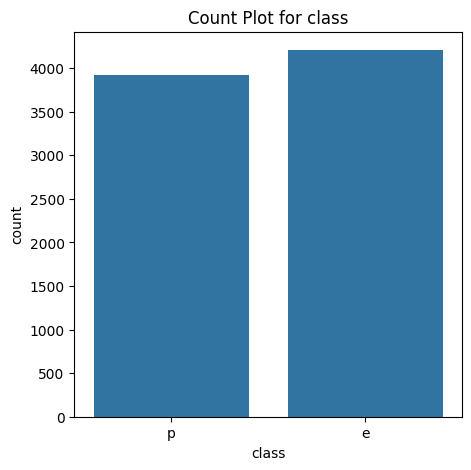

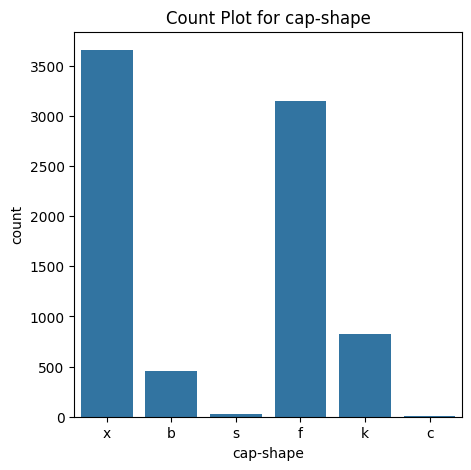

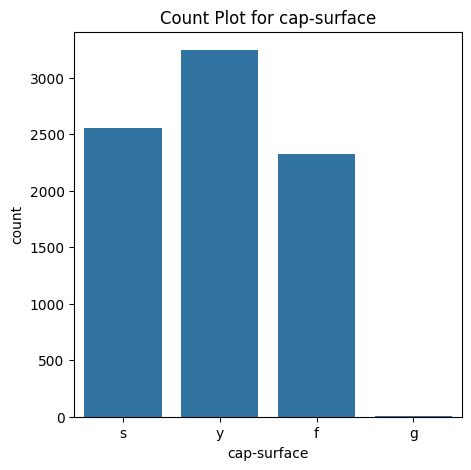

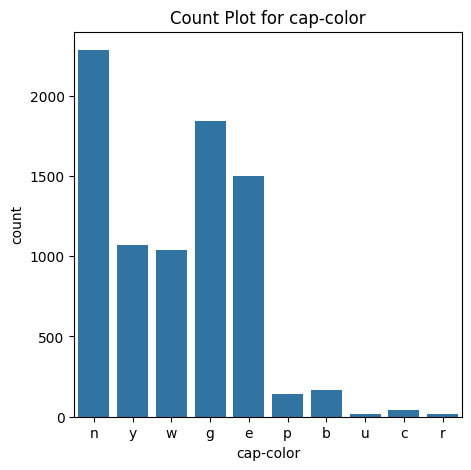

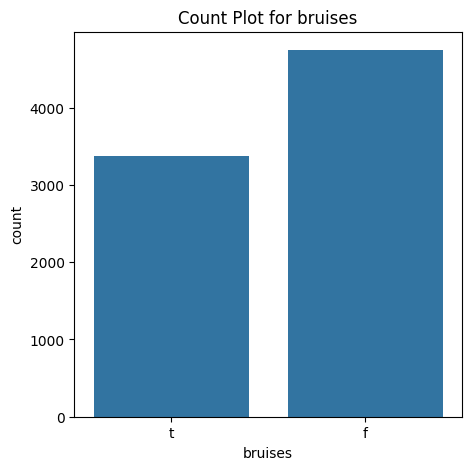

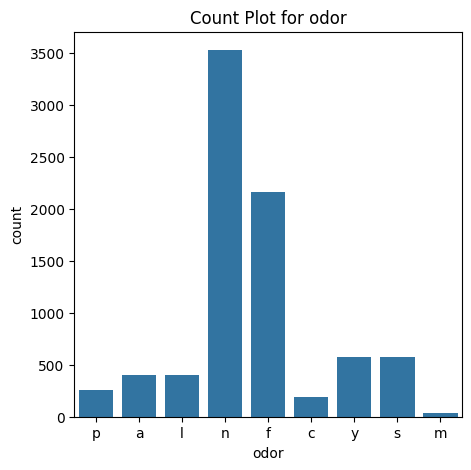

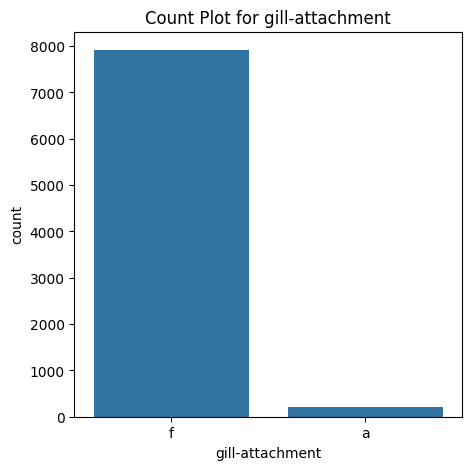

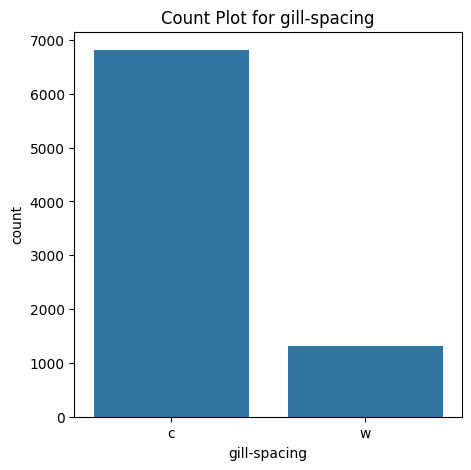

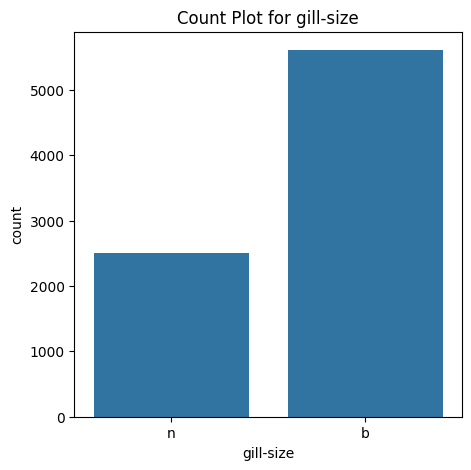

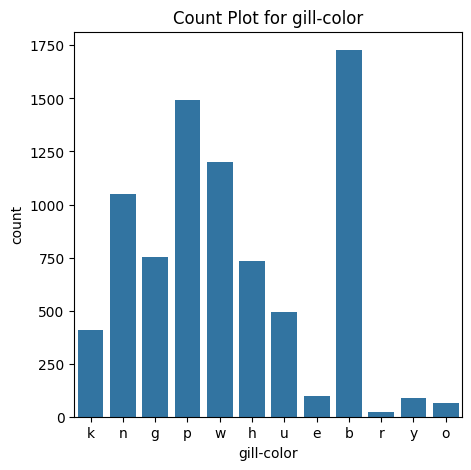

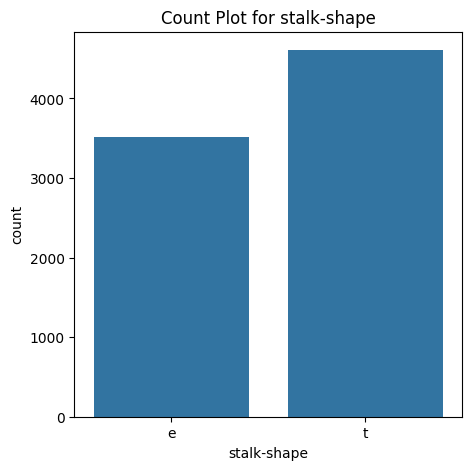

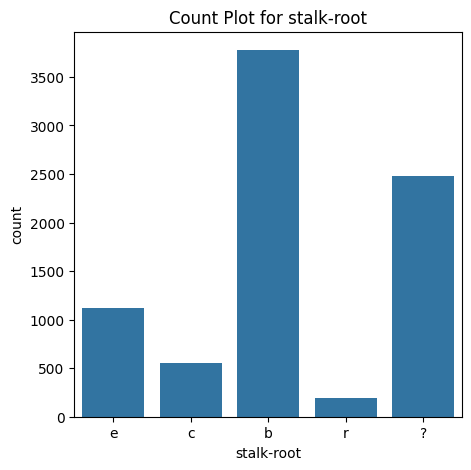

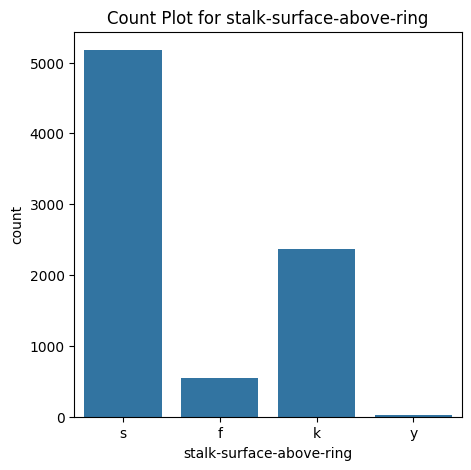

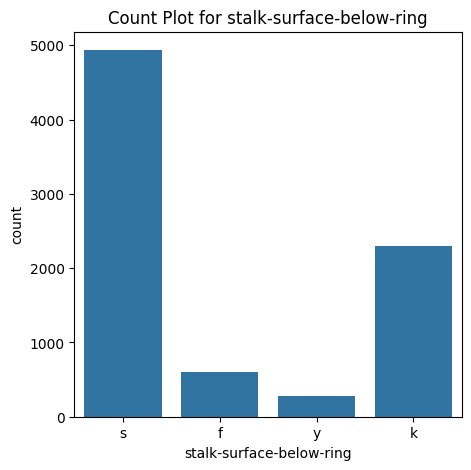

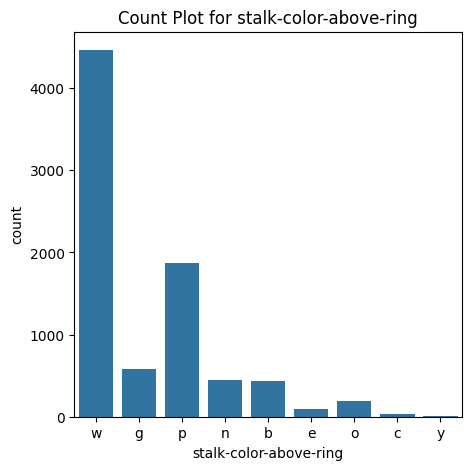

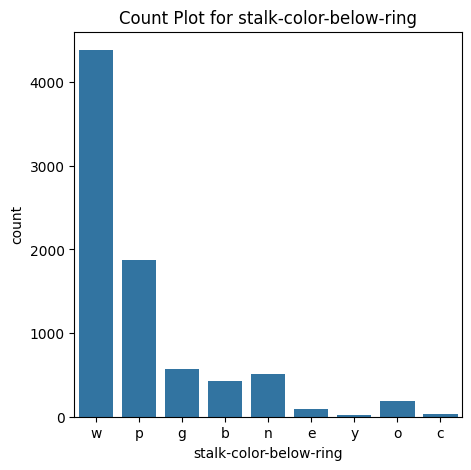

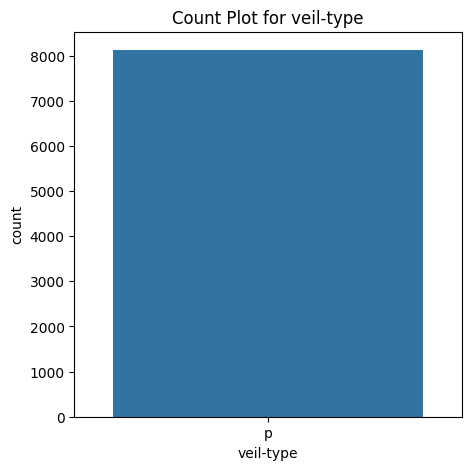

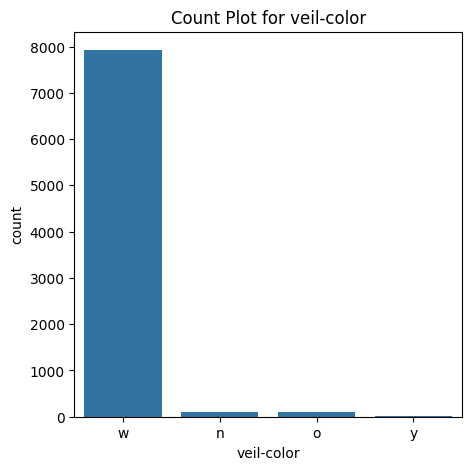

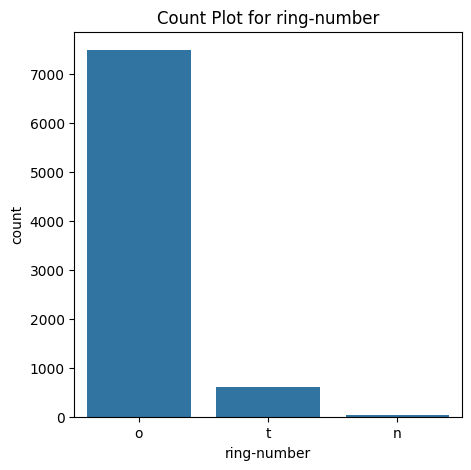

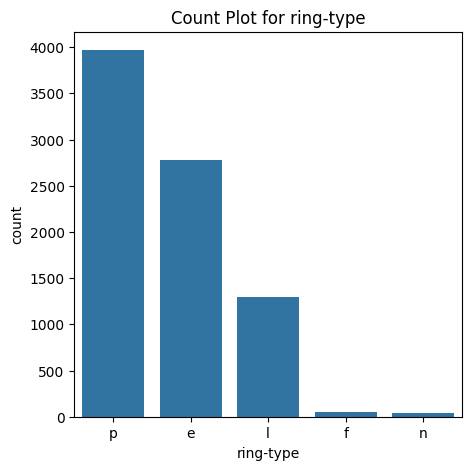

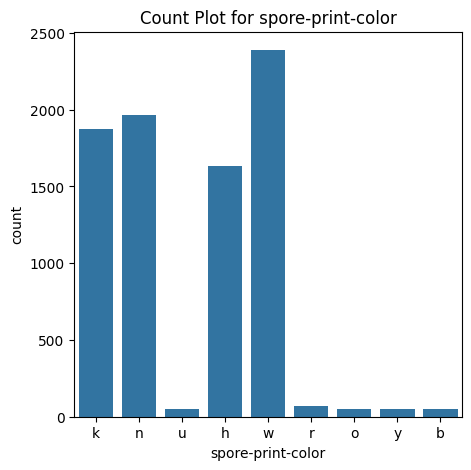

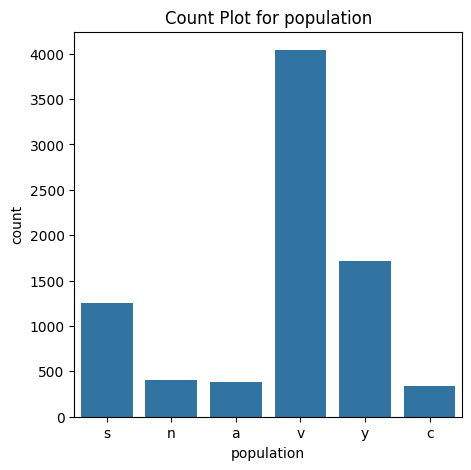

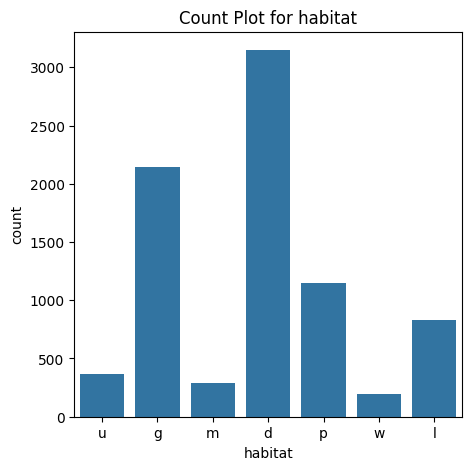

In [70]:
# Create count plots for each column
for column in dataset.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x=column, data=dataset)
    plt.title(f'Count Plot for {column}')
    plt.show()

# 2.2 Data prep and cleaning

In [ ]:
# color is common to below columns - ordinal encode for consistency

# #cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# #gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
# #stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# #stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# # veil-color: brown=n,orange=o,white=w,yellow=y
# # spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
# # full color list for all: black=k,brown=n,buff=b, chocolate=h, cinnamon=c,,gray=g,green=r, orange=o,pink=p,purple=u,red=e,white=w,yellow=y

# Initialize OrdinalEncoder
color_encoder = OrdinalEncoder(categories=[['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y'],
                               ['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y'],
                               ['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y'],
                               ['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y'],
                               ['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y'],
                               ['k','n', 'b','h', 'c','g','r','o','p','u','e','w','y']])
# new encoded table
dataset_enc = dataset.copy()

# Columns to encode
columns_to_encode = ['cap-color','gill-color','stalk-color-above-ring','stalk-color-below-ring','veil-color','spore-print-color']

# Apply OrdinalEncoder to the specified columns
dataset_enc[columns_to_encode] = color_encoder.fit_transform(dataset_enc[columns_to_encode])

# Access the categories and create a dictionary
ordinal_mapping = {category: index for index, category in enumerate(color_encoder.categories_[0])}

print(ordinal_mapping)

# save the OrdinalEncoder to a file to transform new data
joblib.dump(color_encoder, f'color_ordinal_encoder.joblib')


dataset_enc.T


{'k': 0, 'n': 1, 'b': 2, 'h': 3, 'c': 4, 'g': 5, 'r': 6, 'o': 7, 'p': 8, 'u': 9, 'e': 10, 'w': 11, 'y': 12}


,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,p,e,e,p,e,e,e,e,p,e,...,p,e,p,p,p,e,e,e,p,e
cap-shape,x,x,b,x,x,x,b,b,x,b,...,f,x,k,k,k,k,x,f,k,x
cap-surface,s,s,s,y,s,y,s,y,y,s,...,y,s,y,s,y,s,s,s,y,s
cap-color,1.0,12.0,11.0,11.0,5.0,12.0,11.0,11.0,11.0,12.0,...,4.0,1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0
bruises,t,t,t,t,f,t,t,t,t,t,...,f,f,f,f,f,f,f,f,f,f
odor,p,a,l,p,n,a,a,l,p,a,...,m,n,s,y,f,n,n,n,y,n
gill-attachment,f,f,f,f,f,f,f,f,f,f,...,a,a,f,f,f,a,a,a,f,a
gill-spacing,c,c,c,c,w,c,c,c,c,c,...,c,c,c,c,c,c,c,c,c,c
gill-size,n,b,b,n,b,b,b,b,n,b,...,b,b,n,n,n,b,b,b,n,b
gill-color,0.0,0.0,1.0,1.0,0.0,1.0,5.0,1.0,8.0,5.0,...,12.0,12.0,2.0,2.0,2.0,12.0,12.0,1.0,2.0,12.0


Best practice for future proofing would be to ordinal encode all categories of each feature whether there is a value in this dataset or not. As only test/training this data, will label encode all for speed due to time limits of assignment.

In [72]:
#create encoded table
dataset_enc = dataset.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each column
for column in dataset_enc.columns:
    dataset_enc[column] = label_encoder.fit_transform(dataset_enc[column])
    # print encoded category information
    le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    # don't print np-float64
    np.set_printoptions(legacy='1.25')
    print("Encoded Labels ",column,":", le_name_mapping)
    # save the LabelEncoder to a file to transform new data
    joblib.dump(label_encoder, f'label_encoder_{column}.joblib')

# Code to use exported label_encoder on new data
    # # loading the LabelEncoder from the file
    # loaded_le = joblib.load('label_encoder.joblib')

    # # Transforming data with the loaded LabelEncoder
    # loaded_transformed_data = loaded_le.transform(dataset)

    # # Verifying that transformations are identical
    # transformations_equal = (dataset_enc == loaded_transformed_data).all()

    # print("Are the transformations identical?", transformations_equal)

dataset_enc.T

Encoded Labels  class : {'e': 0, 'p': 1}
Encoded Labels  cap-shape : {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
Encoded Labels  cap-surface : {'f': 0, 'g': 1, 's': 2, 'y': 3}
Encoded Labels  cap-color : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
Encoded Labels  bruises : {'f': 0, 't': 1}
Encoded Labels  odor : {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
Encoded Labels  gill-attachment : {'a': 0, 'f': 1}
Encoded Labels  gill-spacing : {'c': 0, 'w': 1}
Encoded Labels  gill-size : {'b': 0, 'n': 1}
Encoded Labels  gill-color : {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
Encoded Labels  stalk-shape : {'e': 0, 't': 1}
Encoded Labels  stalk-root : {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
Encoded Labels  stalk-surface-above-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
Encoded Labels  stalk-surface-below-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
Encoded Labels  stalk-color-ab

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
cap-shape,5,5,0,5,5,5,0,0,5,0,...,2,5,3,3,3,3,5,2,3,5
cap-surface,2,2,2,3,2,3,2,3,3,2,...,3,2,3,2,3,2,2,2,3,2
cap-color,4,9,8,8,3,9,8,8,8,9,...,1,4,4,2,4,4,4,4,4,4
bruises,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
odor,6,0,3,6,5,0,0,3,6,0,...,4,5,7,8,2,5,5,5,8,5
gill-attachment,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,0
gill-spacing,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gill-size,1,0,0,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
gill-color,4,4,5,5,4,5,2,5,7,2,...,11,11,0,0,0,11,11,5,0,11


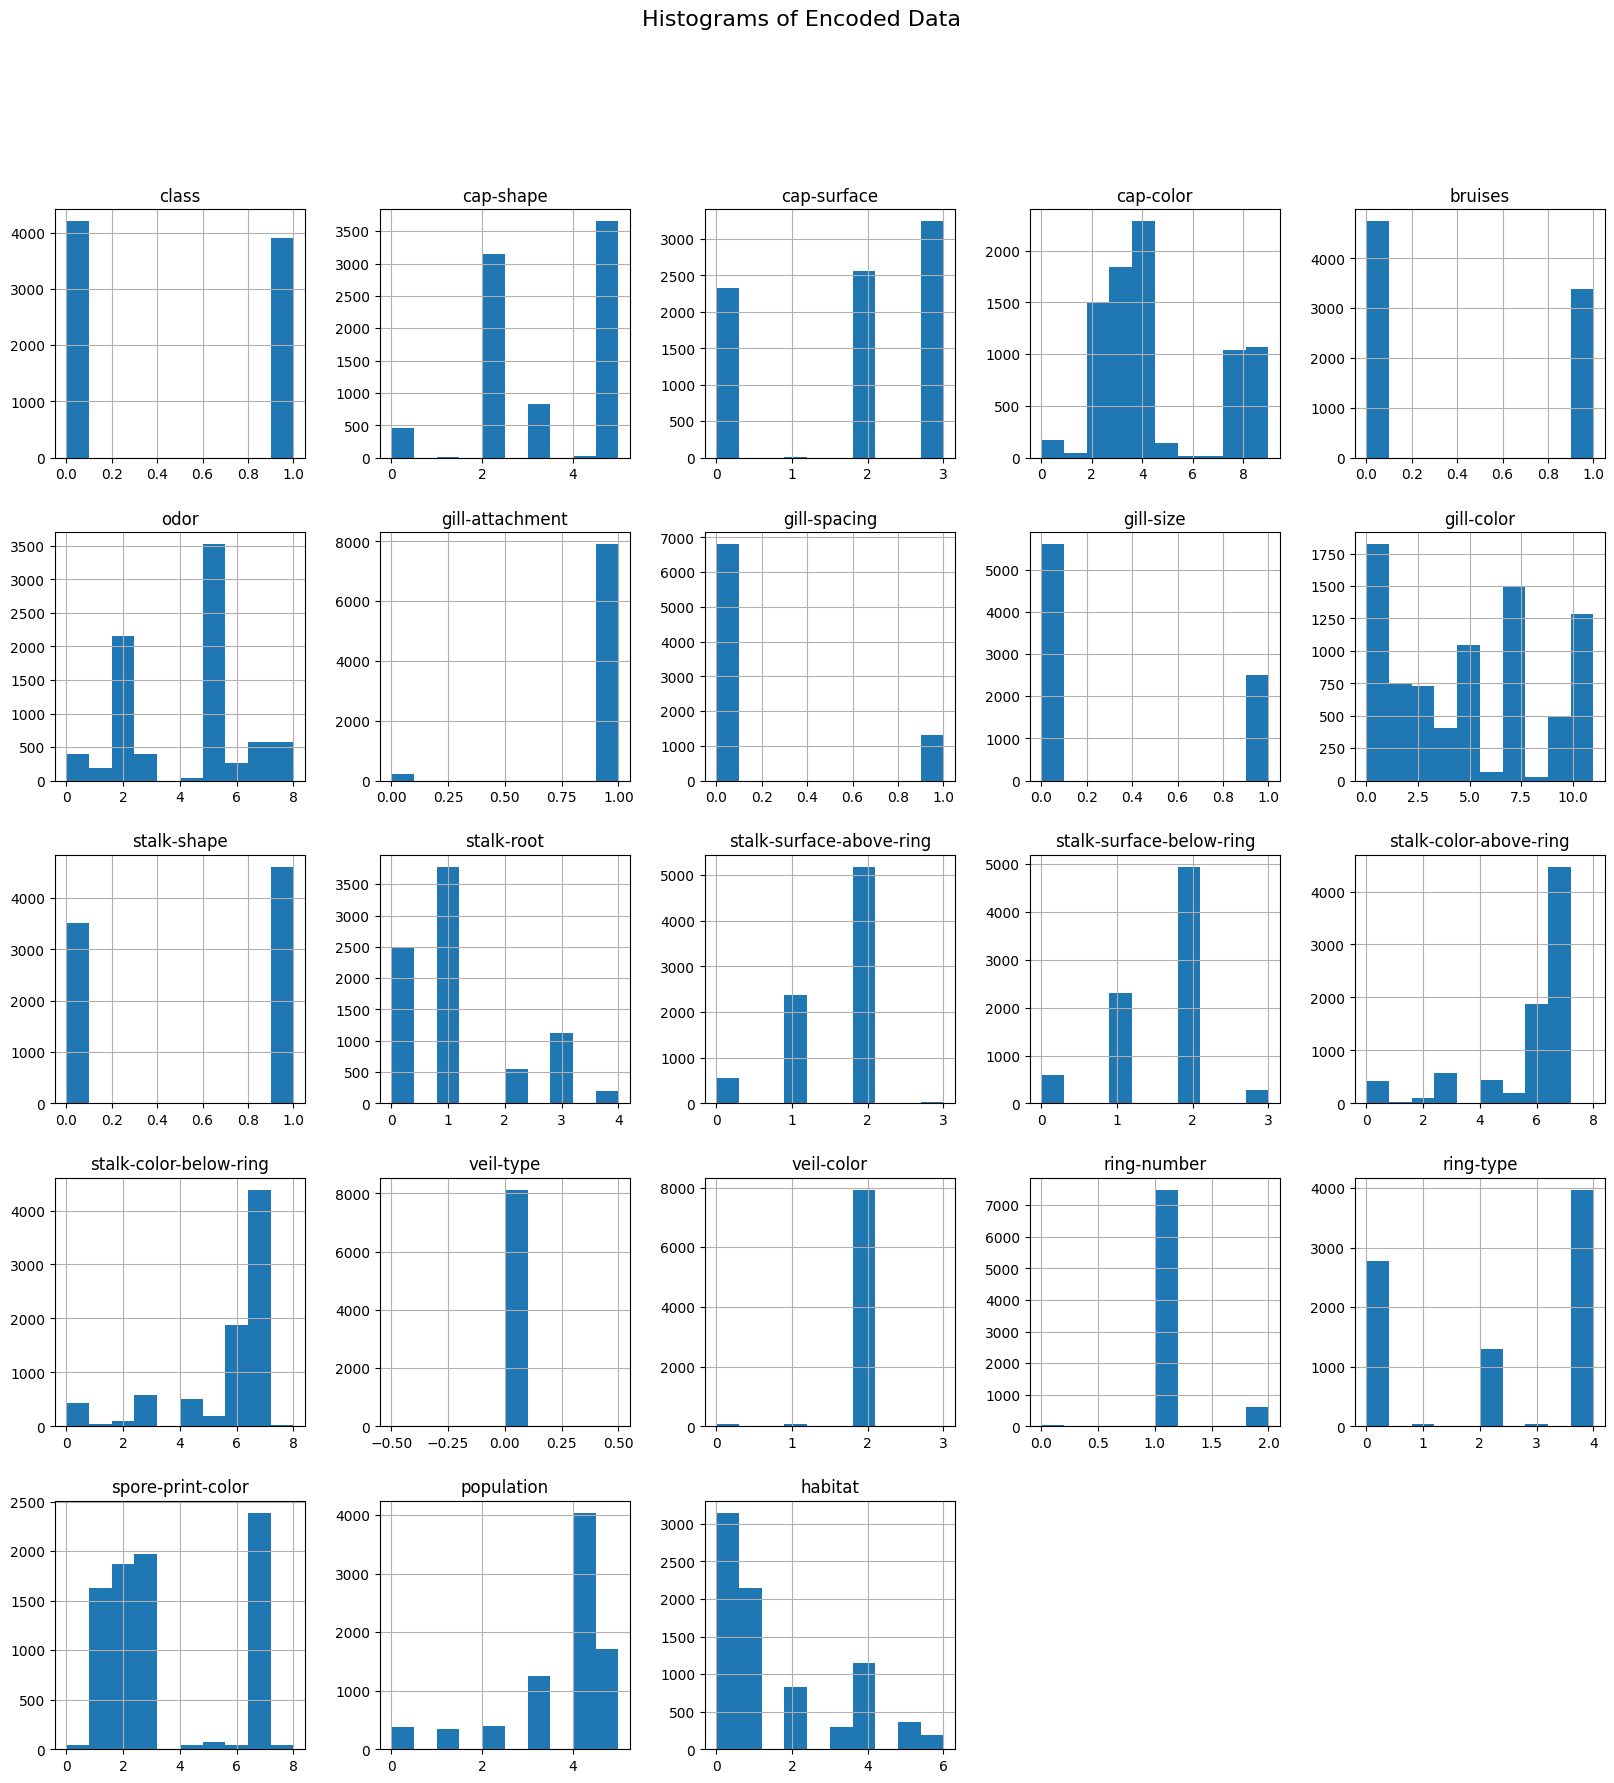

In [73]:
## histogram
dataset_enc.hist(bins= 10, figsize=(20,20))
plt.suptitle('Histograms of Encoded Data ', fontsize=16)
plt.show()

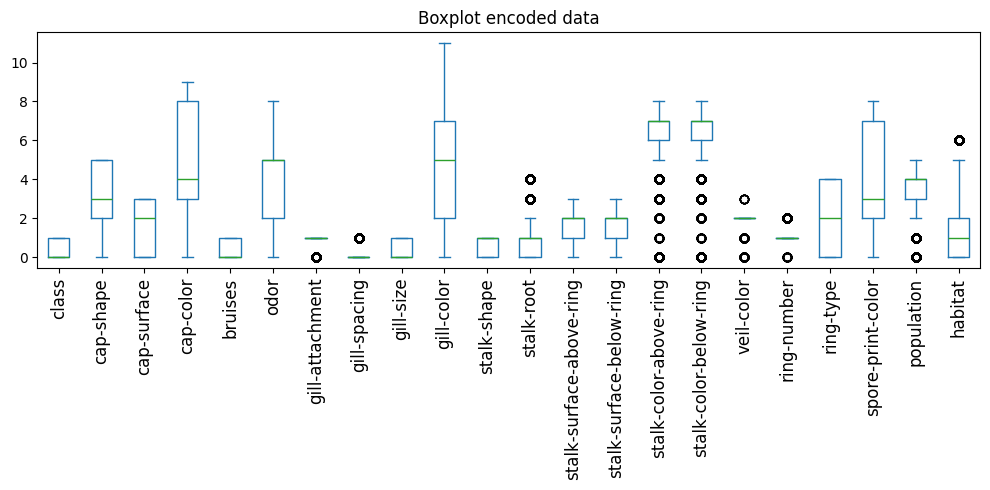

In [113]:
#  boxplot
dataset_enc.plot(kind='box',title="Boxplot encoded data",figsize=(10, 5))
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()
plt.show()

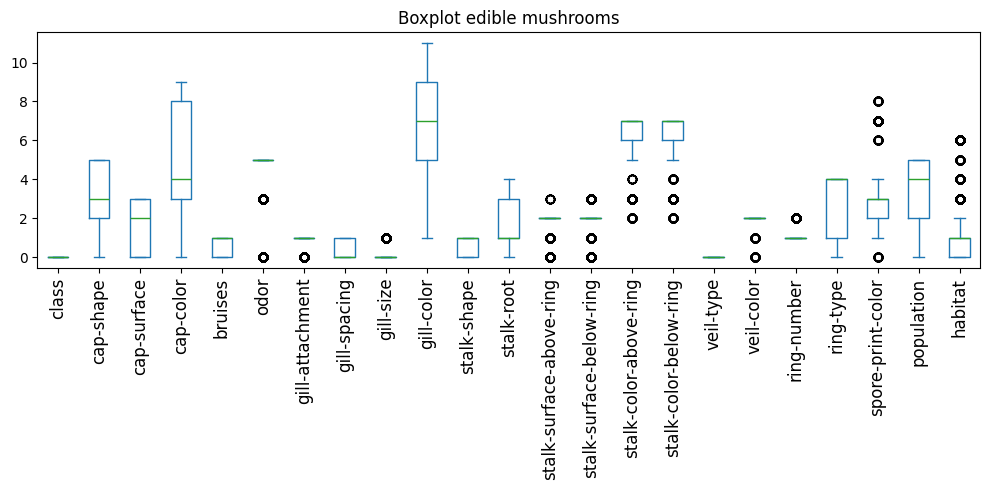

,1,2,4,5,6,7,9,10,11,12,...,8107,8109,8110,8111,8112,8115,8119,8120,8121,8123
class,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cap-shape,5,0,5,5,0,0,0,5,5,0,...,5,0,5,3,3,5,3,5,2,5
cap-surface,2,2,2,3,2,3,2,3,3,2,...,2,2,2,2,2,2,2,2,2,2
cap-color,9,8,3,9,8,8,9,9,9,9,...,4,8,4,8,4,4,4,4,4,4
bruises,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
odor,0,3,5,0,0,3,0,3,0,0,...,5,5,5,5,5,5,5,5,5,5
gill-attachment,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0
gill-spacing,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
gill-size,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gill-color,4,5,4,5,2,5,2,2,5,10,...,11,10,6,7,6,11,11,11,5,11


In [75]:
#  boxplot
edible = dataset_enc[dataset_enc["class"]==0]
edible.plot(kind='box',title="Boxplot edible mushrooms",figsize=(10, 5))
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()
plt.show()

edible.T

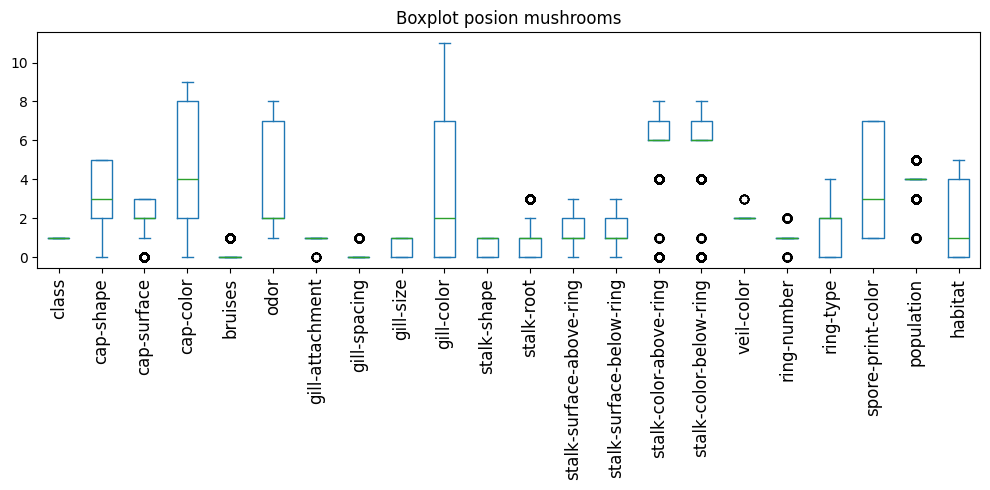

,0,3,8,13,17,18,19,21,25,31,...,8097,8098,8101,8108,8113,8114,8116,8117,8118,8122
class,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cap-shape,5,5,5,5,5,5,5,5,2,5,...,3,3,3,3,3,2,3,3,3,3
cap-surface,2,3,3,3,2,3,2,3,2,3,...,3,2,2,3,3,3,3,2,3,3
cap-color,4,8,8,8,4,8,4,4,8,8,...,4,2,2,2,2,1,4,2,4,4
bruises,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
odor,6,6,6,6,6,6,6,6,6,6,...,7,8,7,8,8,4,7,8,2,8
gill-attachment,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
gill-spacing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gill-size,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
gill-color,4,5,7,4,5,5,4,5,5,4,...,0,0,0,0,0,11,0,0,0,0


In [114]:
#  boxplot
poison = dataset_enc[dataset_enc["class"]==1]
poison.plot(kind='box',title="Boxplot posion mushrooms",figsize=(10, 5))
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()
plt.show()

poison.T

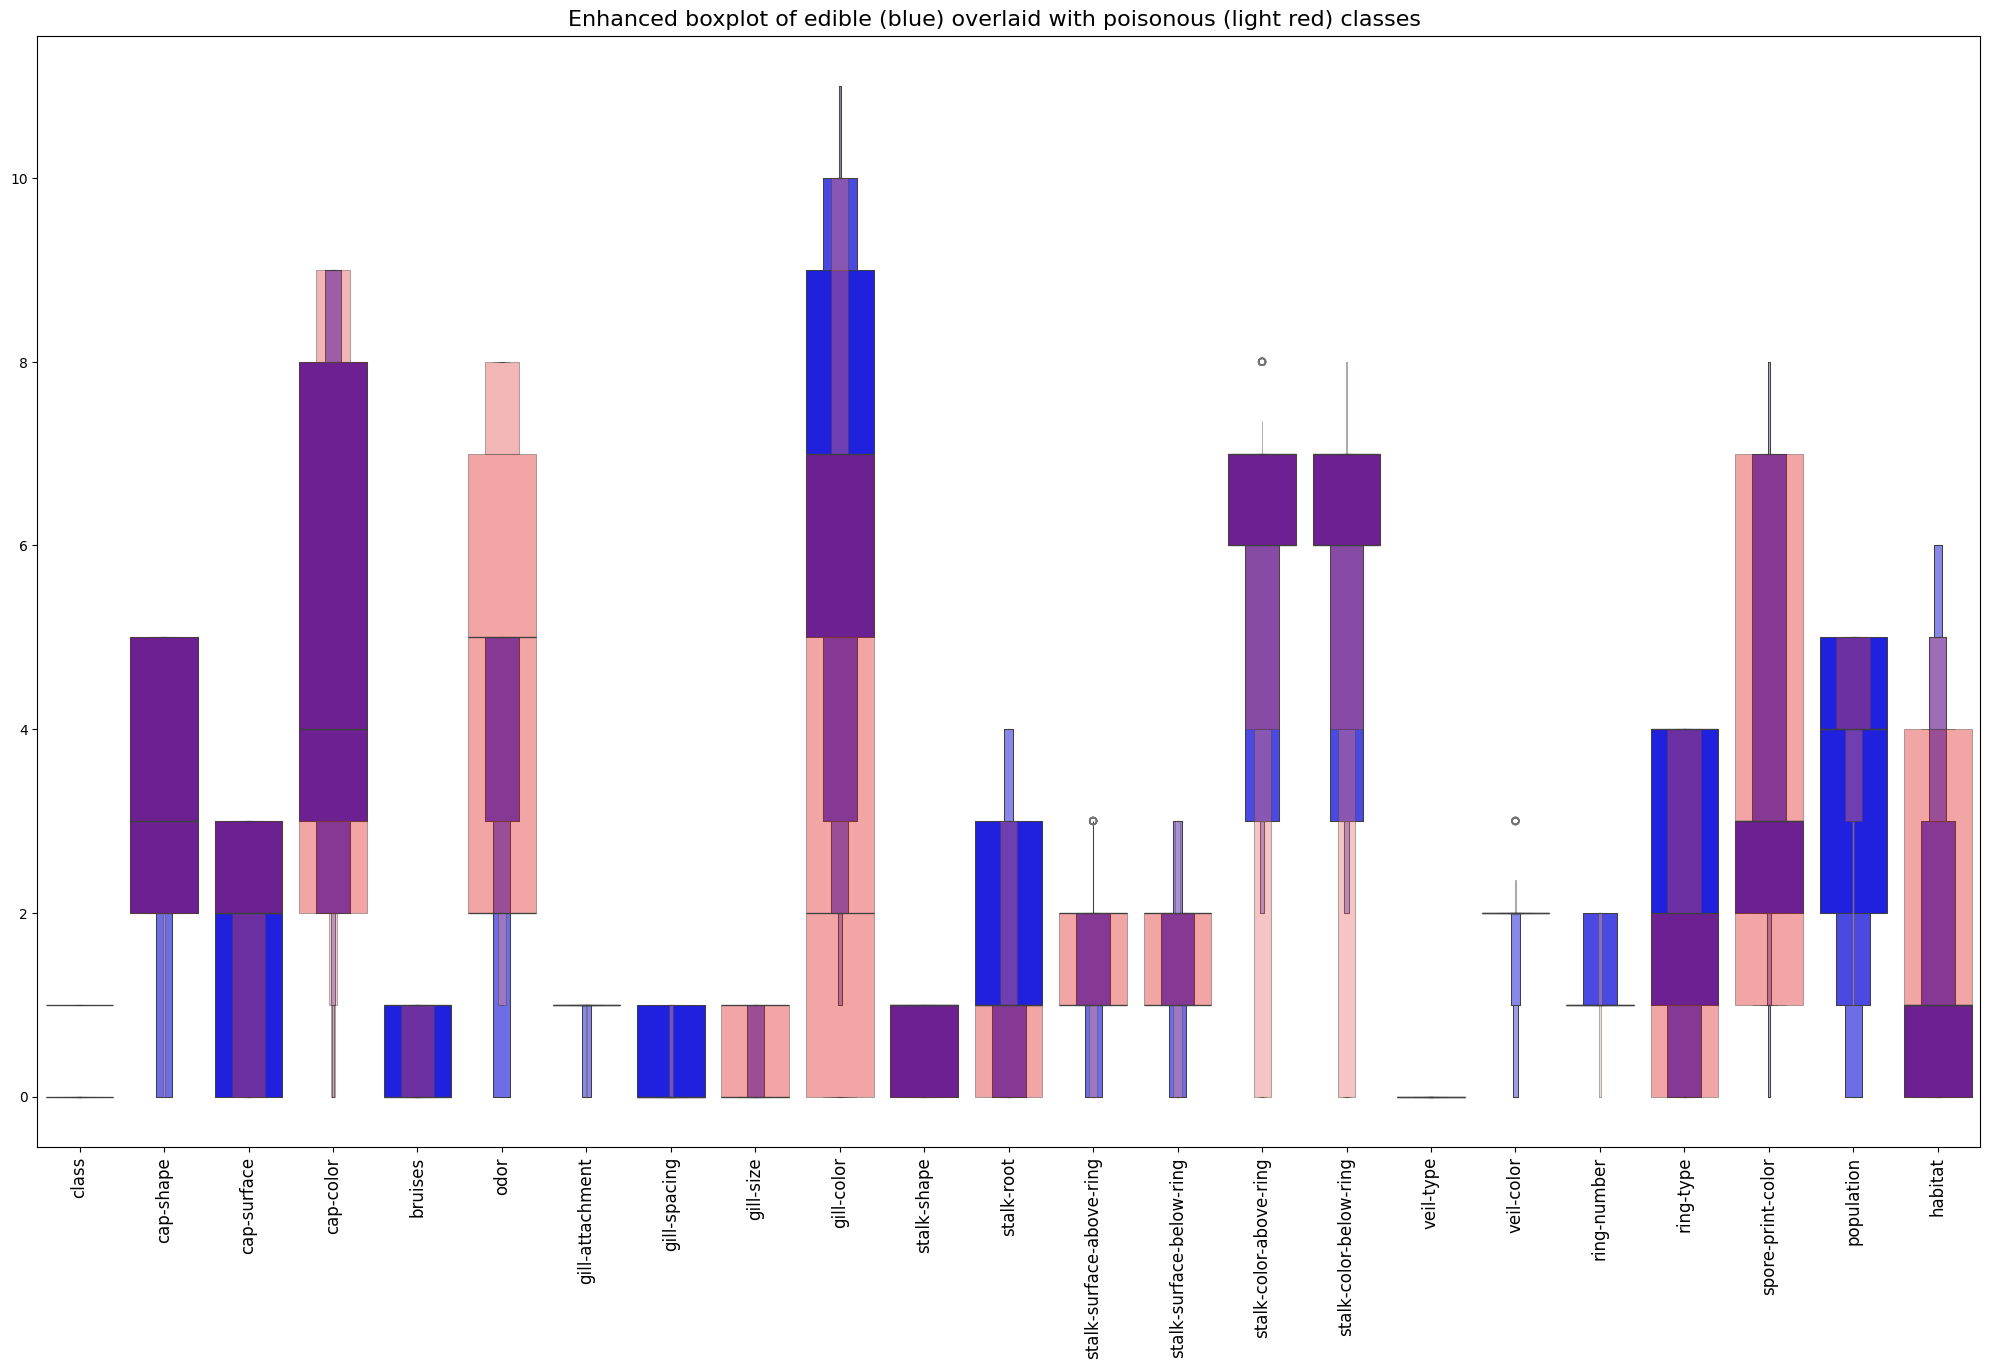

In [77]:
# Enhanced boxplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(1, 1, figsize=(20, 12))  # Increased figure size for more room

sns.boxenplot(edible, color = "blue")
sns.boxenplot(poison, color = "red", alpha = 0.4)

plt.suptitle('Enhanced boxplot of edible (blue) overlaid with poisonous (light red) classes', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.xticks(rotation=90,fontsize=12)
plt.show()

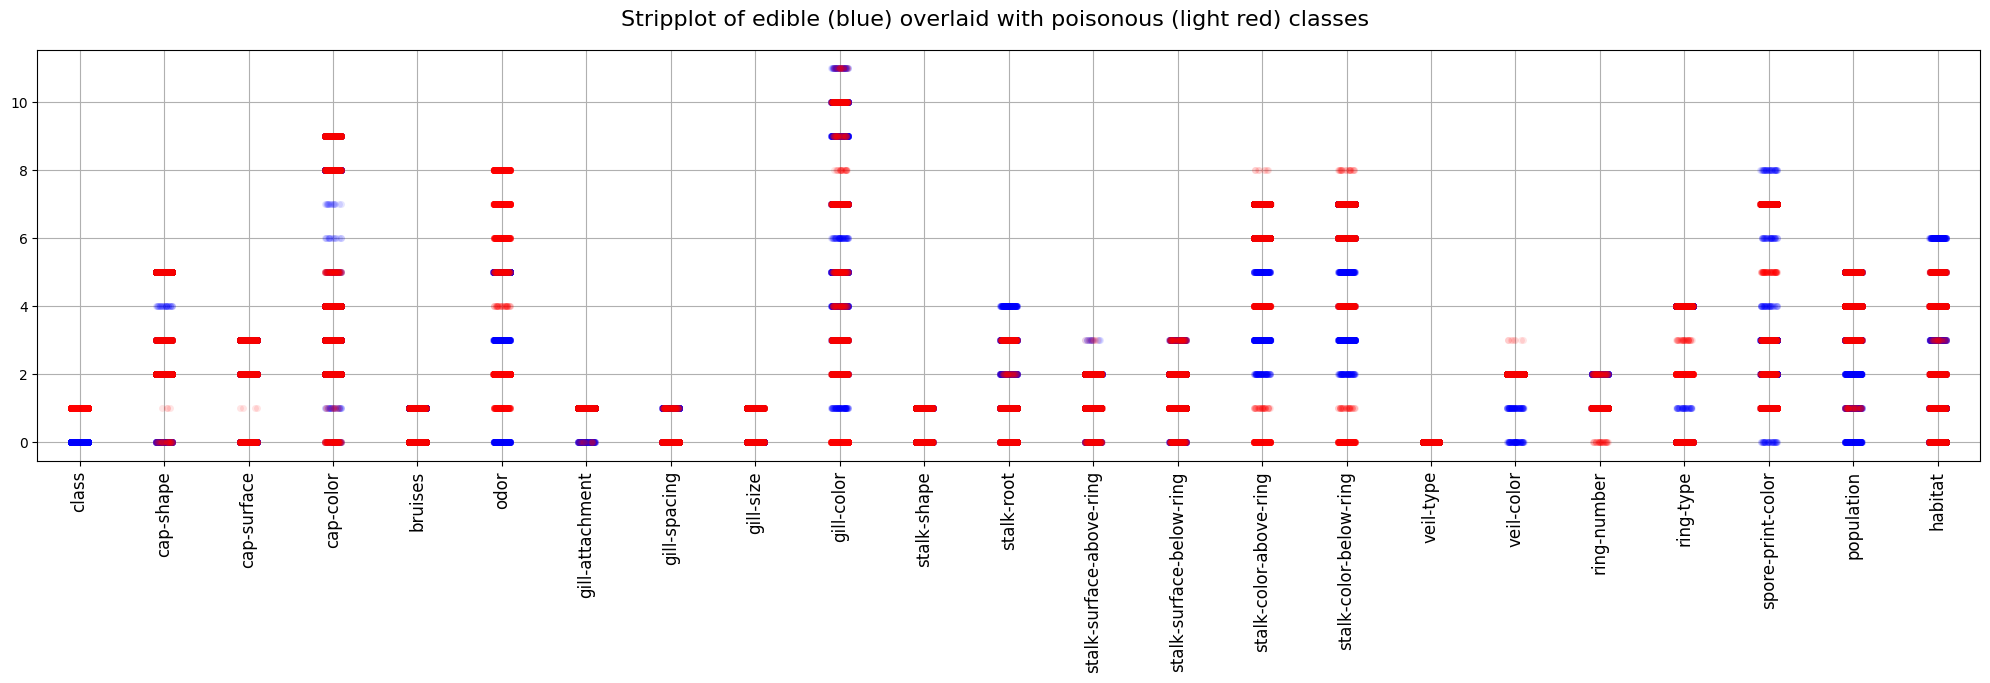

In [78]:
# stripplot 
fig, ax = plt.subplots(1, 1, figsize=(20, 5))  # Increased figure size for more room

sns.stripplot(edible, color = "blue",alpha = 0.1) 
sns.stripplot(poison, color = "red", alpha = 0.1)

plt.suptitle('Stripplot of edible (blue) overlaid with poisonous (light red) classes', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.grid()
plt.xticks(rotation=90,fontsize=12)
plt.show()

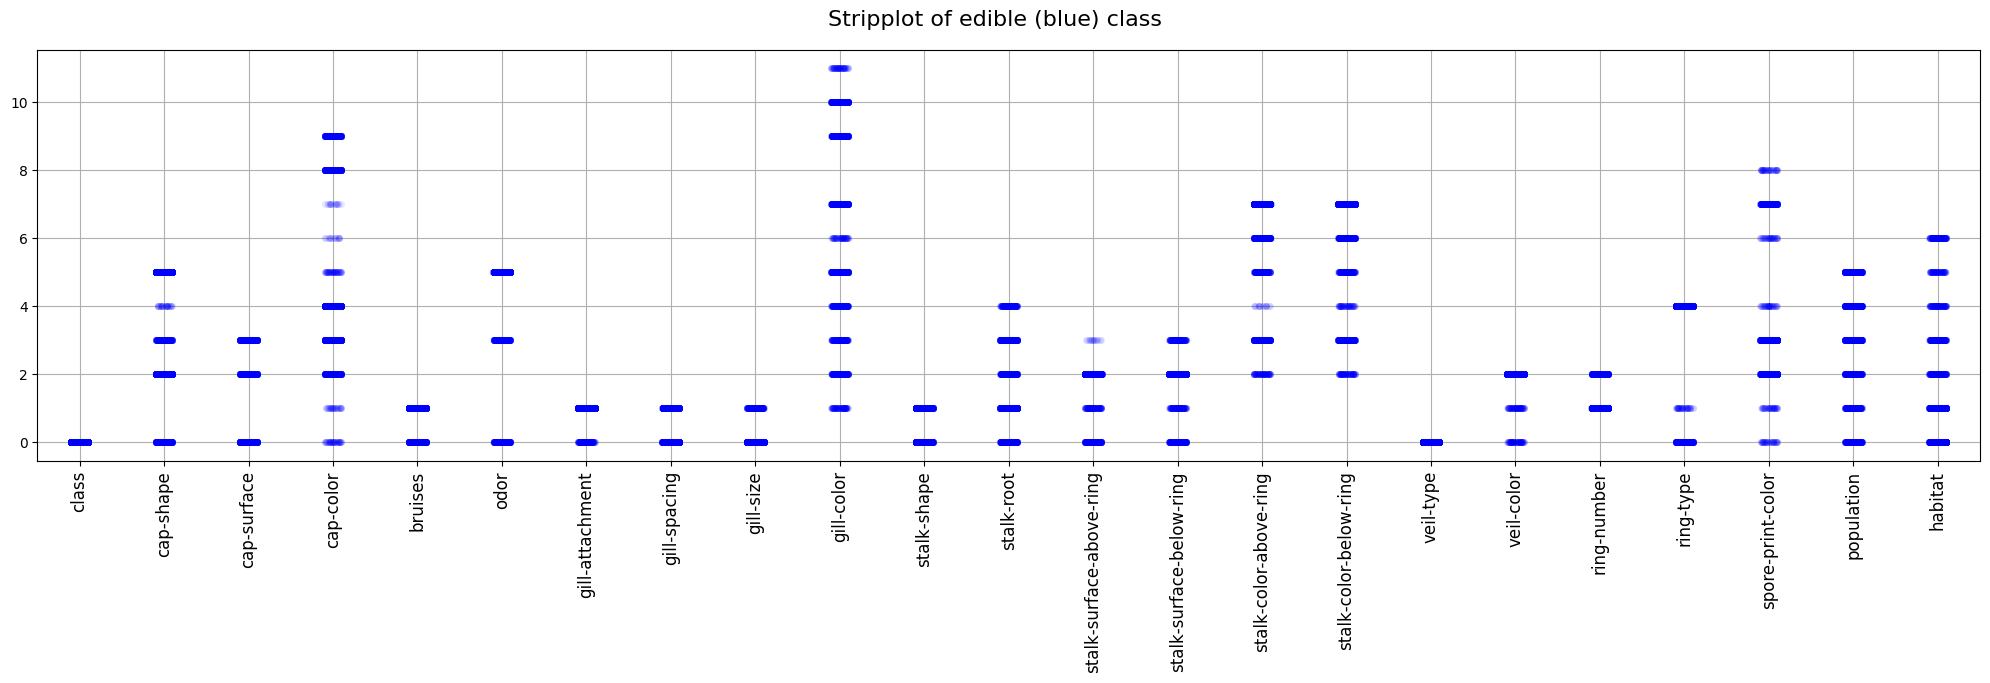

In [79]:
# stripplot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))  # Increased figure size for more room

sns.stripplot(edible, color = "blue",alpha=0.1) 

plt.suptitle('Stripplot of edible (blue) class', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.grid()
plt.xticks(rotation=90,fontsize=12)
plt.show()

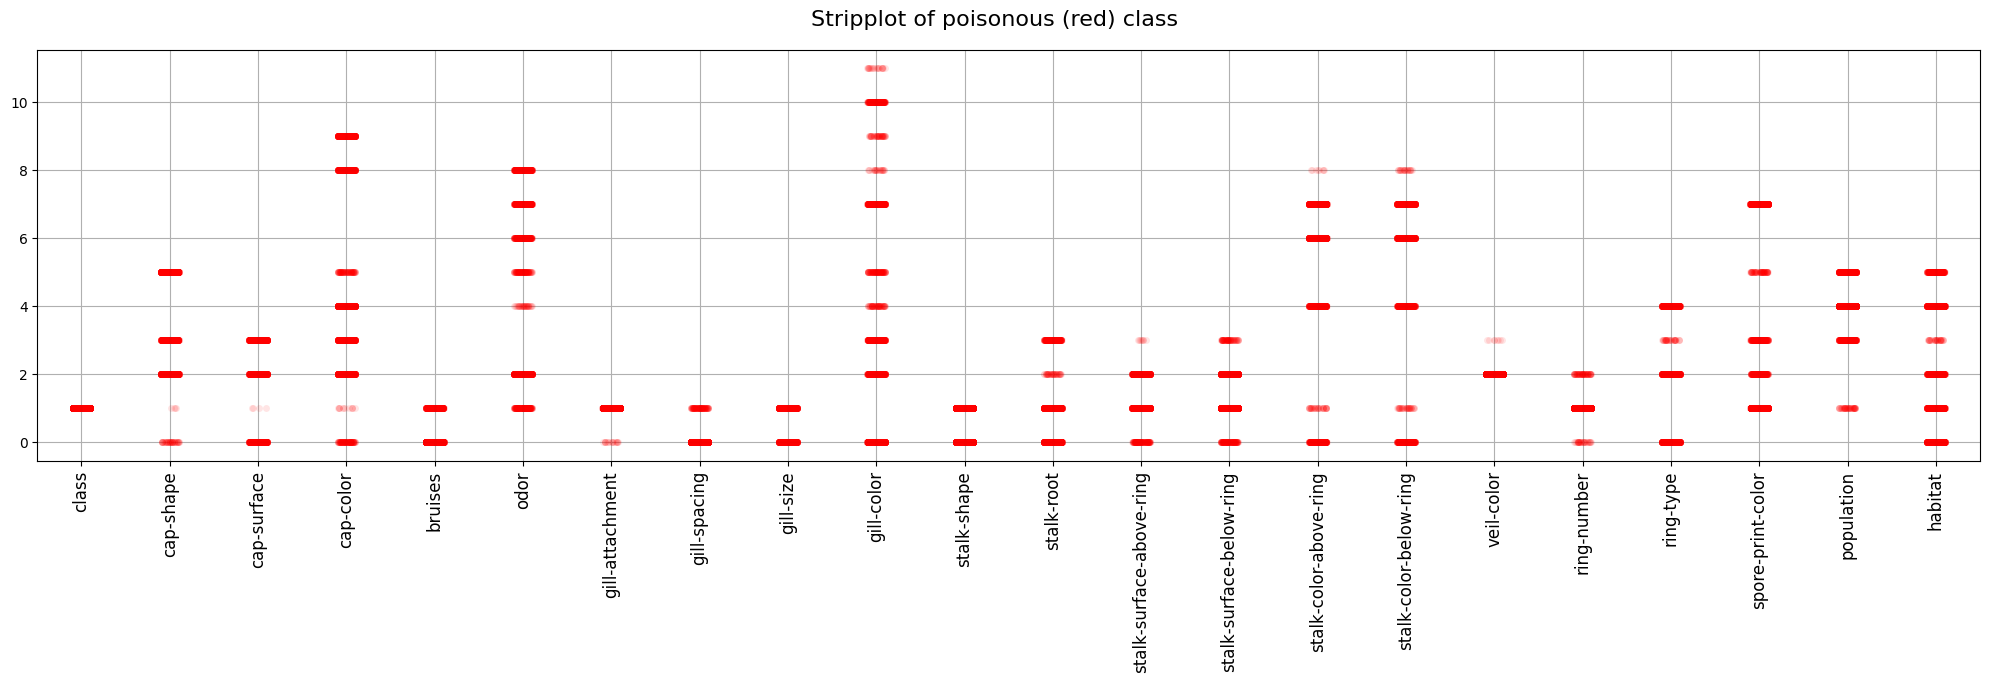

In [115]:
# stripplot
fig, ax = plt.subplots(1, 1, figsize=(20, 5))  # Increased figure size for more room

sns.stripplot(poison, color = "red", alpha = 0.1)

plt.suptitle('Stripplot of poisonous (red) class', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.grid()
plt.xticks(rotation=90,fontsize=12)
plt.show()

Overlay/offset image generated in powerpoint for easier interpretation

<img src="https://github.com/Ddbol/Supervised_ML_Mushrooms/blob/main/Stripplot%20edible%20vs%20poisonous.PNG?raw=true" alt="drawing" width="1500"/>

- Stalk surface both above and below ring are very similar but slightly different (e.g.frequency of 3), as are stalk color above and below ring  (e.g.frequency of 4 and 8)
- Only edible
    - cap shape 4 = s, smooth
    - cap color 6 and 7 = r and u, green and purple
    - odor 0 and 3 = a and l, almond and anise
    - gill color 1 and 6 - e and o, red and orange
    - stalk root 4 - r, rooted
    - stalk color above/below ring 2, 3 and 5 - e, g, o = red, grey and orange
    - veil color 0 and 1 - n and o, brown and orange
    - ring type 1 -e evanescent
    - spore print color 0, 4, 6 and 8 - b, o, u and y = buff, orange, purple, yellow
    - population 0 and 2 - a and n, abundant and numerous
    - habitat 6 - w, waste
- Only poisonous
    - odor 1, 2, 4, 6, 7 and 8 - c, f, m, p, s and y = creosote,foul,musty,pungent,spicy, fishy
    - gill color 0, 8 -b and r, buff and green
    - stalk color above/below ring 0, 1, 8 - b, c, y = buff, cinnamon, yellow
    - ring type 2 and 3 - l and n, large and none
    - spore print color 5 - r, green


Dictionary info encoded:

- Encoded Labels  class : {'e': 0, 'p': 1}
- Encoded Labels  cap-shape : {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
- Encoded Labels  cap-surface : {'f': 0, 'g': 1, 's': 2, 'y': 3}
- Encoded Labels  cap-color : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
- Encoded Labels  bruises : {'f': 0, 't': 1}
- Encoded Labels  odor : {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
- Encoded Labels  gill-attachment : {'a': 0, 'f': 1}
- Encoded Labels  gill-spacing : {'c': 0, 'w': 1}
- Encoded Labels  gill-size : {'b': 0, 'n': 1}
- Encoded Labels  gill-color : {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
- Encoded Labels  stalk-shape : {'e': 0, 't': 1}
- Encoded Labels  stalk-root : {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
- Encoded Labels  stalk-surface-above-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
- Encoded Labels  stalk-surface-below-ring : {'f': 0, 'k': 1, 's': 2, 'y': 3}
- Encoded Labels  stalk-color-above-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
- Encoded Labels  stalk-color-below-ring : {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
- Encoded Labels  veil-type : {'p': 0}
- Encoded Labels  veil-color : {'n': 0, 'o': 1, 'w': 2, 'y': 3}
- Encoded Labels  ring-number : {'n': 0, 'o': 1, 't': 2}
- Encoded Labels  ring-type : {'e': 0, 'f': 1, 'l': 2, 'n': 3, 'p': 4}
- Encoded Labels  spore-print-color : {'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}
- Encoded Labels  population : {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
- Encoded Labels  habitat : {'d': 0, 'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6}

Dictionary info letter meaning:
- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d    
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?  
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y 
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u 
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

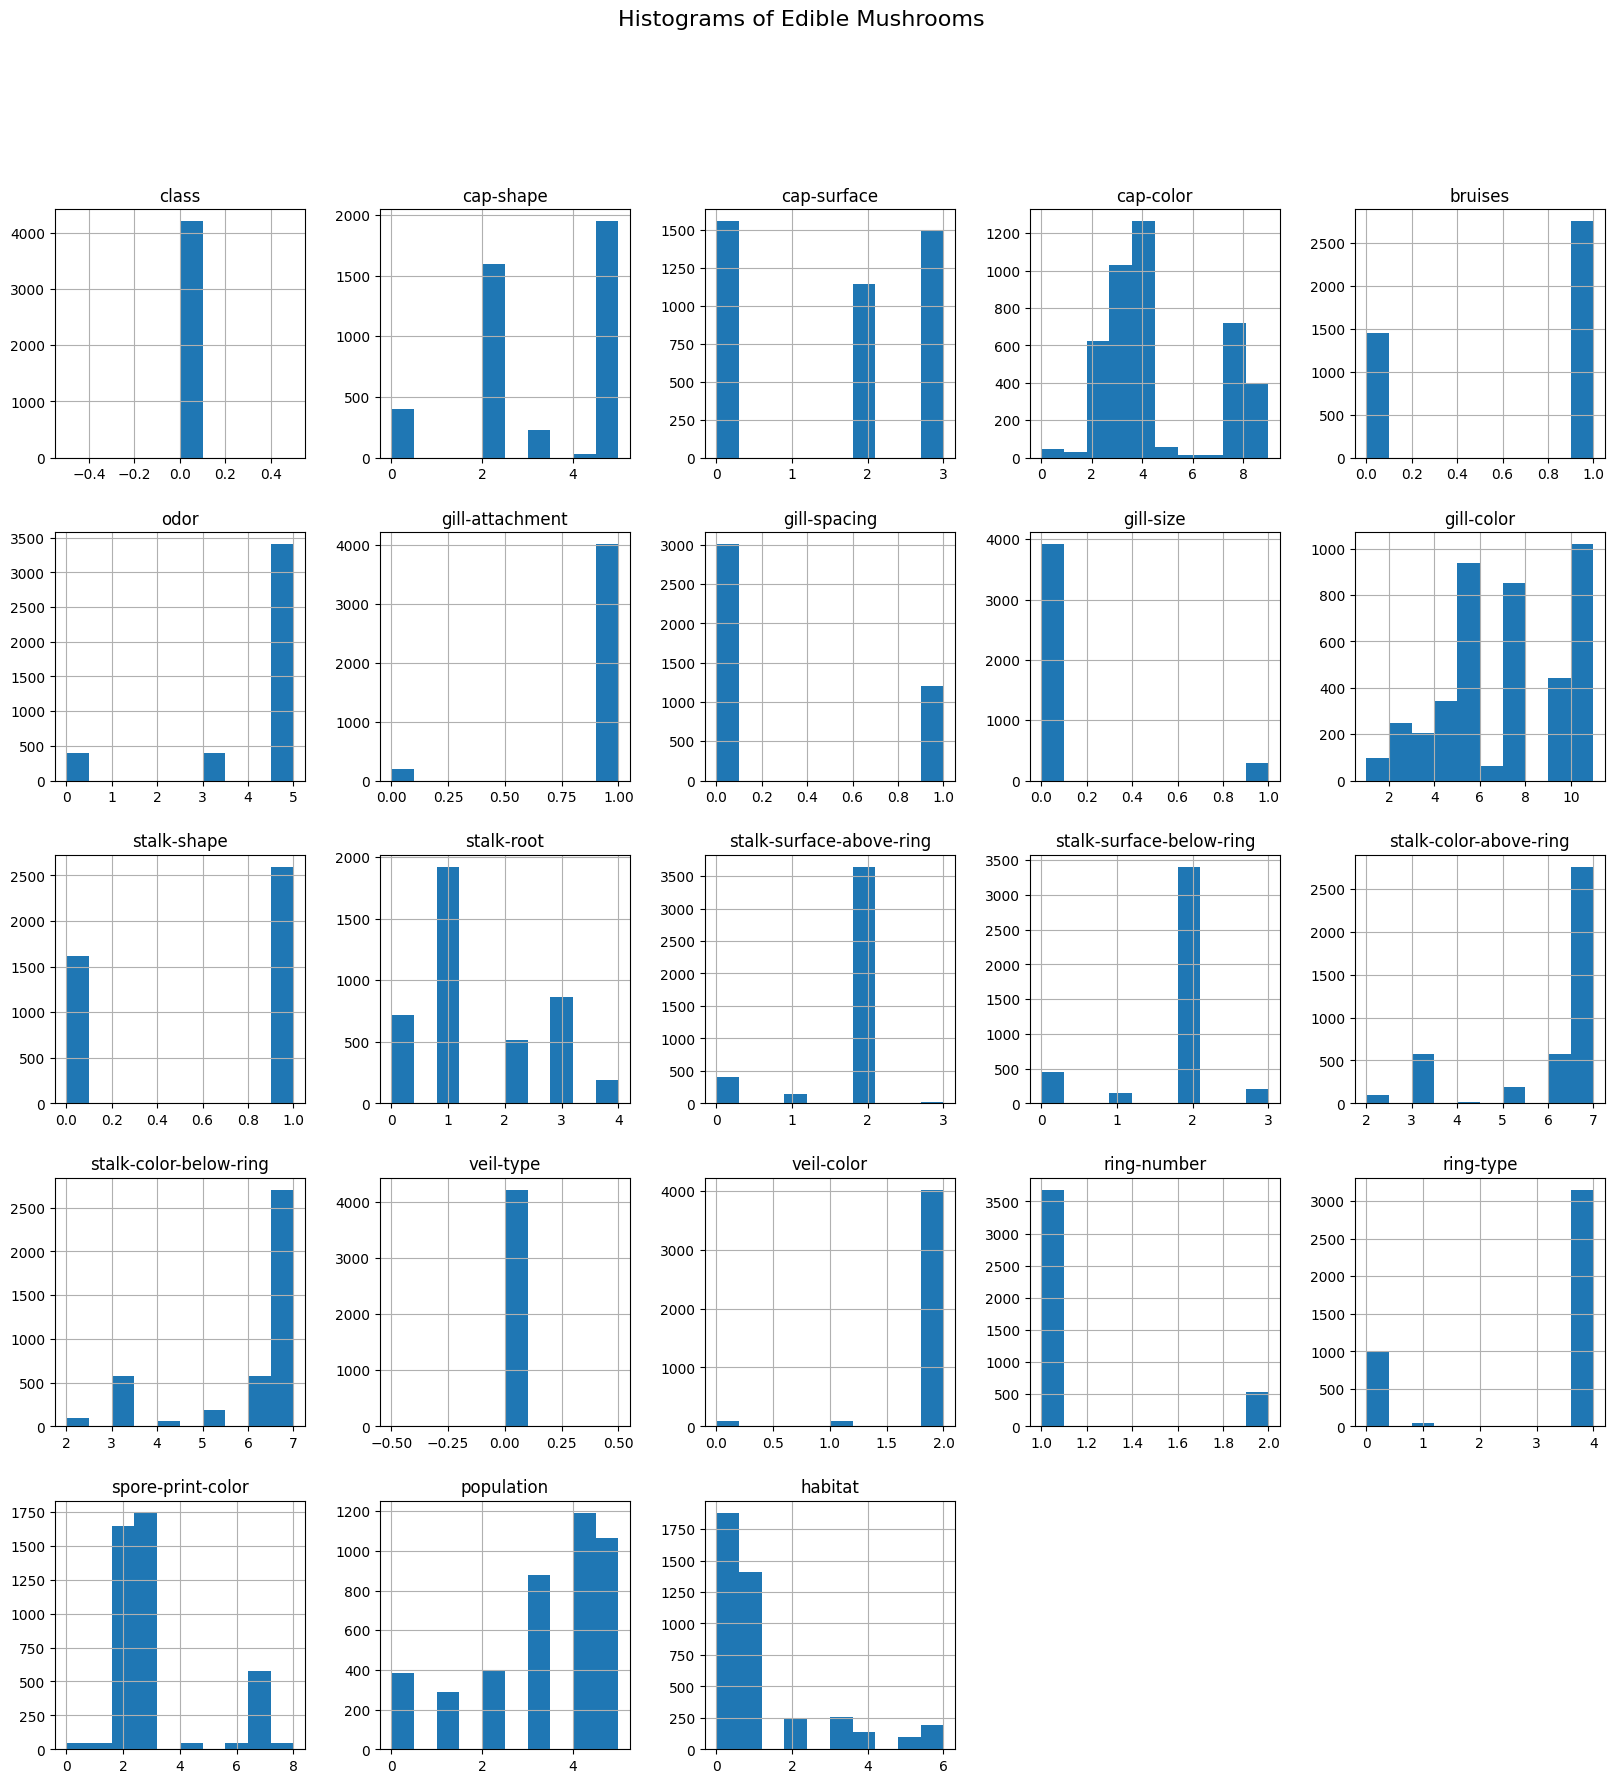

In [81]:
## histogram
edible.hist(bins= 10, figsize=(20,20))
plt.suptitle('Histograms of Edible Mushrooms ', fontsize=16)
plt.show()

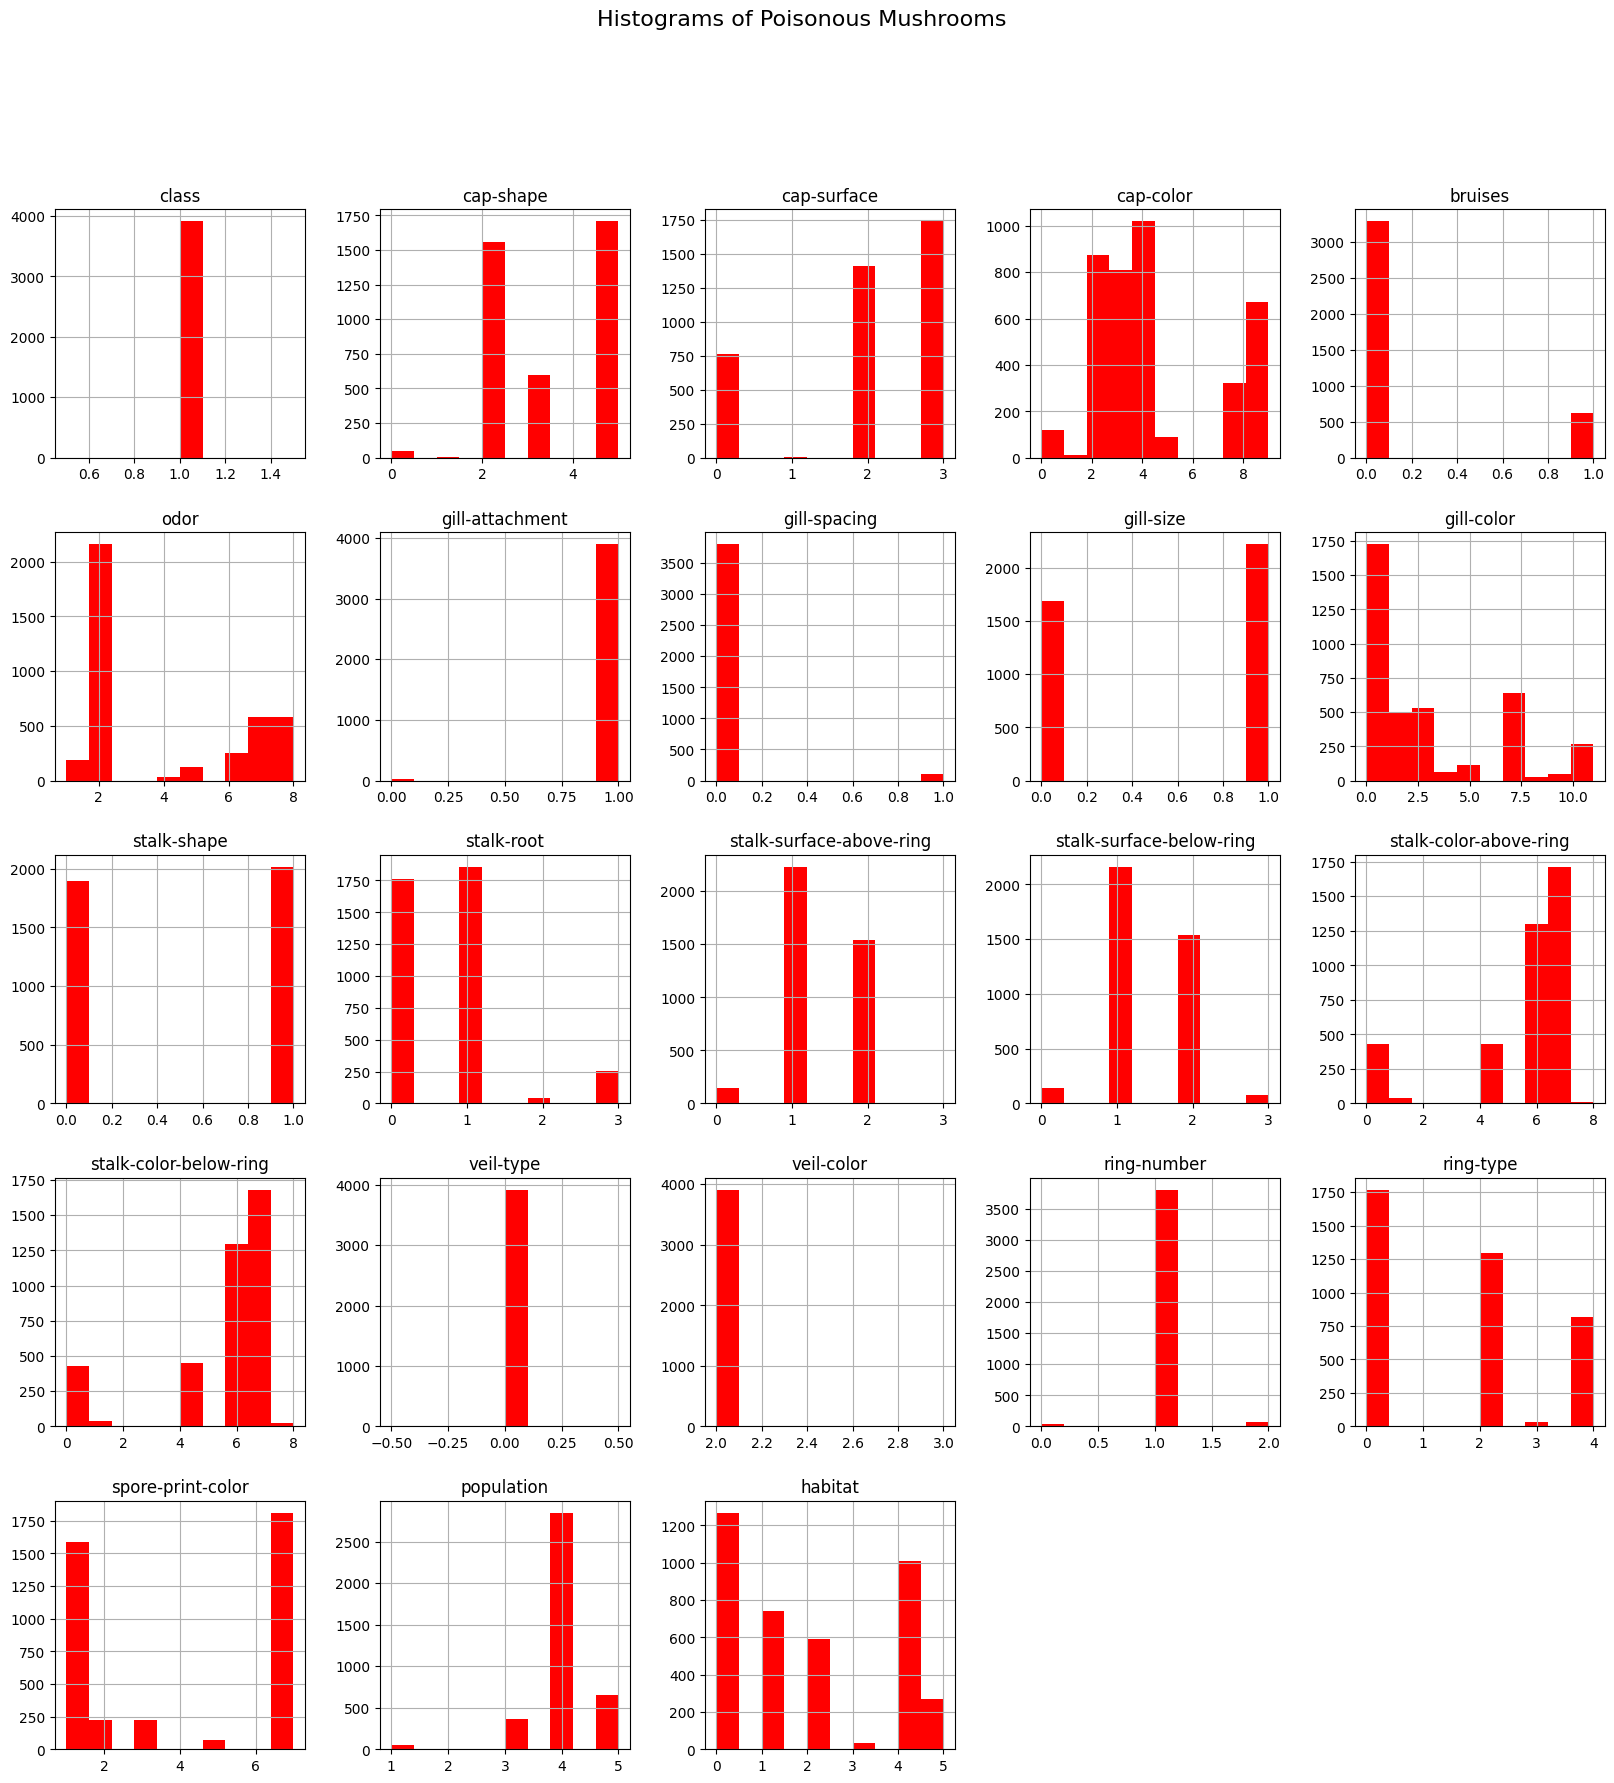

In [82]:
## histogram
poison.hist(bins= 10, figsize=(20,20), color = "red")
plt.suptitle('Histograms of Poisonous Mushrooms ', fontsize=16)
plt.show()

                             class
class                     1.000000
cap-shape                 0.052951
cap-surface               0.178446
cap-color                -0.031384
bruises                  -0.501530
odor                     -0.093552
gill-attachment           0.129200
gill-spacing             -0.348387
gill-size                 0.540024
gill-color               -0.530566
stalk-shape              -0.102019
stalk-root               -0.379361
stalk-surface-above-ring -0.334593
stalk-surface-below-ring -0.298801
stalk-color-above-ring   -0.154003
stalk-color-below-ring   -0.146730
veil-type                      NaN
veil-color                0.145142
ring-number              -0.214366
ring-type                -0.411771
spore-print-color         0.171961
population                0.298686
habitat                   0.217179


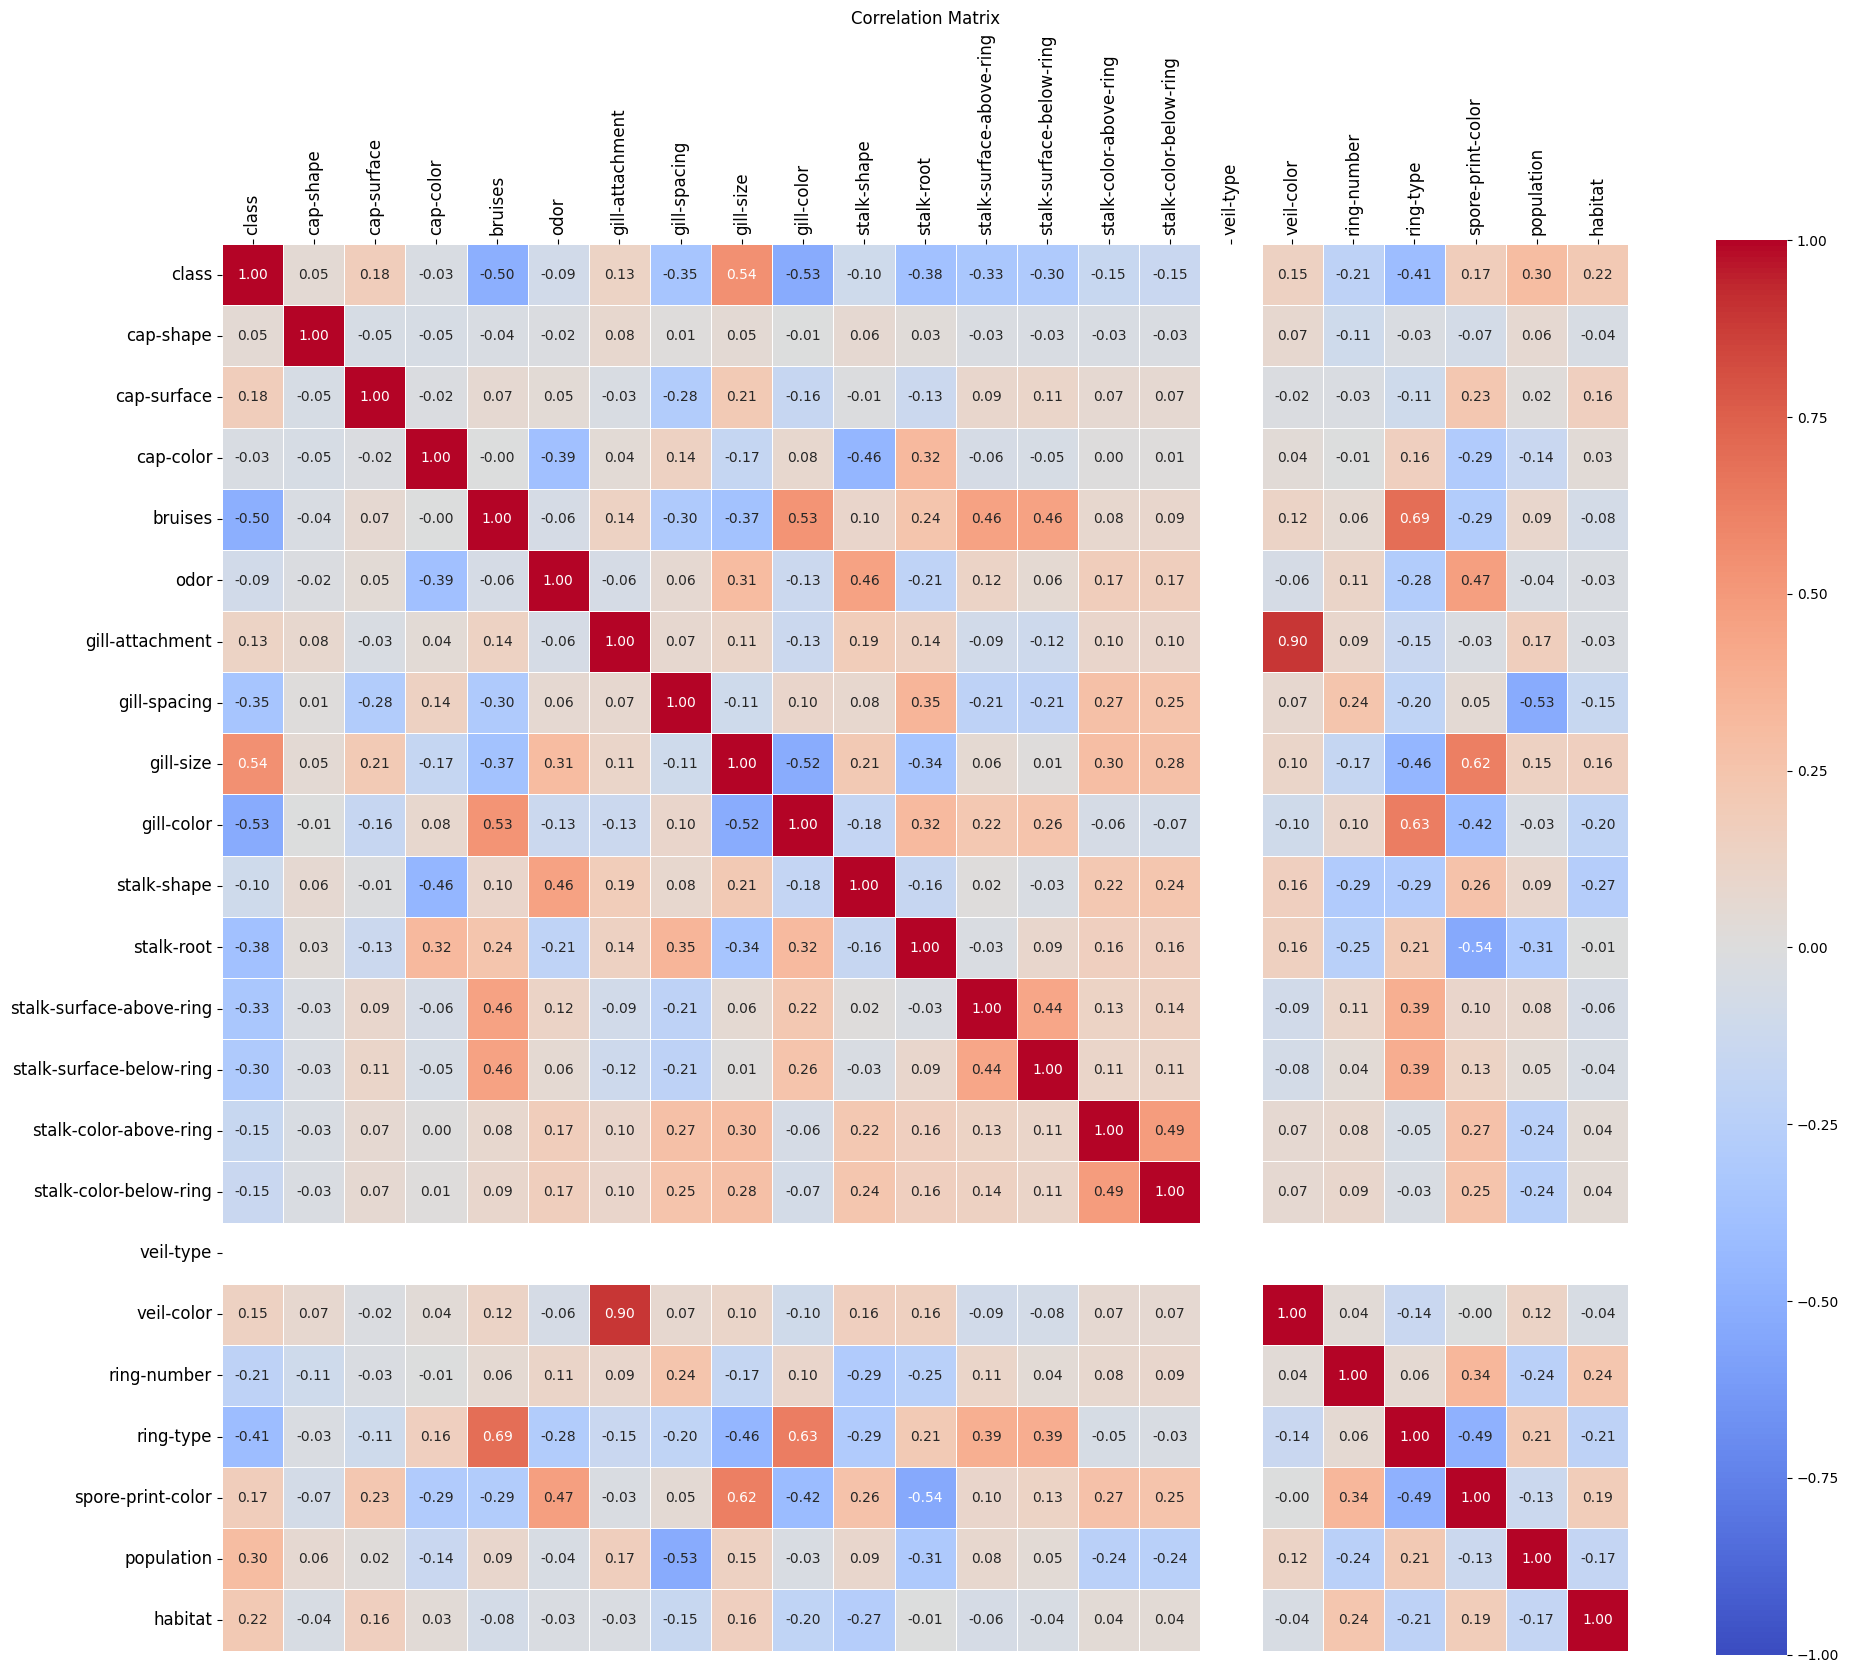

In [83]:
## correlation mat
corr_mat = dataset_enc.corr()
corr_matrix_results = pd.DataFrame(corr_mat["class"])
print(corr_matrix_results)

# create heatmap of correlation matrix
fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_mat,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
ax.xaxis.tick_top()
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=0,fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
# Drop veil type (only one data value not adding to model )
dataset_enc.drop(columns = "veil-type", inplace = True)
dataset_enc.T

,0,1,2,3,4,5,6,7,8,9,...,8114,8115,8116,8117,8118,8119,8120,8121,8122,8123
class,1,0,0,1,0,0,0,0,1,0,...,1,0,1,1,1,0,0,0,1,0
cap-shape,5,5,0,5,5,5,0,0,5,0,...,2,5,3,3,3,3,5,2,3,5
cap-surface,2,2,2,3,2,3,2,3,3,2,...,3,2,3,2,3,2,2,2,3,2
cap-color,4,9,8,8,3,9,8,8,8,9,...,1,4,4,2,4,4,4,4,4,4
bruises,1,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
odor,6,0,3,6,5,0,0,3,6,0,...,4,5,7,8,2,5,5,5,8,5
gill-attachment,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,1,0
gill-spacing,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gill-size,1,0,0,1,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,1,0
gill-color,4,4,5,5,4,5,2,5,7,2,...,11,11,0,0,0,11,11,5,0,11


# 3 Modelling
# 3.1 Logistic regression model 


In [85]:
## independednt and dependent variable
X = dataset_enc.iloc[:, 1:]
y = dataset_enc.iloc[:, 0]

## split our dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## logistic regression model
log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
log_reg.fit(x_train, y_train)

## predict on the test data
y_pred_log = log_reg.predict(x_test)

## putting in a dataframe
df = pd.DataFrame({'Actual_Value': y_test, 'Predicted_value': y_pred_log})
print("Predicted vs Actual taable",df)

## evaluate the model accuracy
print("\n","accuracy: ",accuracy_score(y_test, y_pred_log))


## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_log)

print("\n","confusion matrix: ","\n",conf_mat)

#normalisated
normed_c = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
print("\n","normalised confusion matrix: ","\n",normed_c)



Predicted vs Actual taable       Actual_Value  Predicted_value
6506             1                1
5656             1                1
4908             1                1
1384             0                0
3305             0                0
...            ...              ...
2580             0                0
5132             1                1
7463             0                0
1600             0                0
3385             0                0

[2438 rows x 2 columns]

 accuracy:  0.9622641509433962

 confusion matrix:  
 [[1215   40]
 [  52 1131]]

 normalised confusion matrix:  
 [[0.96812749 0.03187251]
 [0.04395604 0.95604396]]


In [86]:
print("\n","classifciation report: ","\n",classification_report(y_test, y_pred_log))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)


 classifciation report:  
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1255
           1       0.97      0.96      0.96      1183

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

AUC: 0.962086


# 3.2 SVM

In [109]:
## independednt and dependent variable
X = dataset_enc.iloc[:, 1:]
y = dataset_enc.iloc[:, 0]

## split our dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
print("Scaler has been re-saved successfully!")


Scaler has been re-saved successfully!


In [111]:
# Instantiating the SVM algorithm 
#Create a SVM Classifier
svm_linear = svm.SVC(kernel='linear')
svm_sigmoid = svm.SVC(kernel='sigmoid') 
svm_rbf = svm.SVC(kernel='rbf') 

# Fitting the model 
svm_linear.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predicting the test variables
y_pred_linear = svm_linear.predict(x_test)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Getting the score 
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print("\n","confusion matrix svm linear: ","\n",conf_mat_linear)
print("\n","confusion matrix svm sigmoid: ","\n",conf_mat_sigmoid)
print("\n","confusion matrix svm rbf: ","\n",conf_mat_rbf)

#normalisated
normed_c_linear = conf_mat_linear / np.sum(conf_mat_linear, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm linear: ","\n",normed_c_linear)
normed_c_sigmoid = conf_mat_sigmoid / np.sum(conf_mat_sigmoid, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm sigmoid: ","\n",normed_c_sigmoid)
normed_c_rbf = conf_mat_rbf / np.sum(conf_mat_rbf, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm rbf: ","\n",normed_c_rbf)




Linear Kernel Accuracy: 0.9827727645611156
Sigmoid kernel Accuracy: 0.8072190319934373
rbf kernelAccuracy: 1.0

 confusion matrix svm linear:  
 [[1237   18]
 [  24 1159]]

 confusion matrix svm sigmoid:  
 [[1010  245]
 [ 225  958]]

 confusion matrix svm rbf:  
 [[1255    0]
 [   0 1183]]

 normalised confusion matrix svm linear:  
 [[0.98565737 0.01434263]
 [0.0202874  0.9797126 ]]

 normalised confusion matrix svm sigmoid:  
 [[0.80478088 0.19521912]
 [0.19019442 0.80980558]]

 normalised confusion matrix svm rbf:  
 [[1. 0.]
 [0. 1.]]


In [107]:
# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC linear: %f' %auc)
auc = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC sigmoid: %f' %auc)
auc = roc_auc_score(y_test, y_pred_rbf)
print('AUC rbf: %f' %auc)

# classification report
print("\n","Linear Kernel classifciation report: ","\n",classification_report(y_test, y_pred_linear))
print("\n","Sigmoid kernal classifciation report: ","\n",classification_report(y_test, y_pred_sigmoid))
print("\n","rbf kernel classifciation report: ","\n",classification_report(y_test, y_pred_rbf))


AUC linear: 0.982685
AUC sigmoid: 0.807293
AUC rbf: 1.000000

 Linear Kernel classifciation report:  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1255
           1       0.98      0.98      0.98      1183

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438


 Sigmoid kernal classifciation report:  
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1255
           1       0.80      0.81      0.80      1183

    accuracy                           0.81      2438
   macro avg       0.81      0.81      0.81      2438
weighted avg       0.81      0.81      0.81      2438


 rbf kernel classifciation report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1255
           1       1.00      1.00      1.00      118

# 3.3 Pipeline exploration

Pipelines are a more efficient way to evaluate models versus iterative coding. To understand pipelines better will attempt to repeat the models above and compare output. 

In [96]:
"""Setting up a pipeline to:
1. scale using StandardScaler (Z-scores using mean), RobustScaler (centered around median) and MinMaxSacler
2. using logistic regression, KNN, support vector classifier, a decision tree classifier and a voting classifier ensmble of all these models
3. using k-fold cross-validation then comparing classification metrics: accuracy, precision, recall and F1-score, as well as a confusion matrix
"""

# define the models, scalers and hyper-paramaeters to try
parameter_grid = [
    {
        'scaler': [StandardScaler()],
        'model': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)]
    },
    {
        'scaler': [StandardScaler()],
        'model': [SVC()],
        'model__kernel': ['linear', 'rbf','sigmoid']
    },
        # Add the VotingClassifier here
    {
        'scaler': [StandardScaler()],
        'model': [VotingClassifier(
            estimators=[
                ('lr', LogisticRegression()),
                ('svc', SVC(probability=True))
            ])
        ],
        'model__voting': ['hard', 'soft'],
        'model__weights': [None, [1, 1], [2, 1], [1, 2]]
    }
]


# store results of each model
results = []

for params in parameter_grid:
    # store model name as a variable
    model_name = type(params['model'][0]).__name__

    # create Pipeline formatting to structure GridSearchCV
    pipeline = Pipeline([
        ('scaler', params['scaler'][0]),
        ('model', params['model'][0])
    ])

    # use GridSearch cross-validation with k=10
    grid_search = GridSearchCV(pipeline, params, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # get the best pipeline and make predictions on our test set
    best_pipeline = grid_search.best_estimator_
    y_prediction = best_pipeline.predict(x_test)

    # define our accuracy, precision, recall, f1_score
    best_cv_accuracy = grid_search.best_score_
    auc = roc_auc_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)

    # store results
    results.append({
        'Model:': model_name,
        'Test Accuracy:': best_cv_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F-1 Score': f1,
        'AUC':auc,
        'Best Hyperparamters': grid_search.best_params_,
    })

# results DataFrame
results_df = pd.DataFrame(results)

# print comparison of all models
print("\nComparison of all models:")
print(results_df.to_string(index=False))

# Find and print the best overall model
best_model = results_df.loc[results_df['Test Accuracy:'].idxmax()]
print("\nBest Overall Model:")
print(best_model.to_string())


Comparison of all models:
            Model:  Test Accuracy:  Test Precision  Test Recall  Test F-1 Score      AUC                                                                                                                                                                                                Best Hyperparamters
LogisticRegression        0.952693        0.965841     0.956044        0.960918 0.962086                                                                                                                                          {'model': LogisticRegression(random_state=0), 'scaler': StandardScaler()}
               SVC        1.000000        1.000000     1.000000        1.000000 1.000000                                                                                                                                               {'model': SVC(), 'model__kernel': 'rbf', 'scaler': StandardScaler()}
  VotingClassifier        1.000000        1.000000     1.000000        1.

SVM outputting 100% result from rbf model so matches and is the winning model. 

Logistic regression similar to non pipeline scores for accuracy, precision, recall but not exact match due to individual scoring for 0 and 1 results. F1 and AUC exact match

Log regression information - 
- accuracy:  0.9622641509433962
- AUC: 0.962086

 classifciation report:  
               precision,        recall,       f1-score,        support

           0       0.96      0.97      0.96      1255
           1       0.97      0.96      0.96      1183

    accuracy                           0.96      2438





Next run SVM without rbf which gives perfect score to review output for other SVM models. Linear should be best

In [97]:
"""Setting up a pipeline to:
1. scale using StandardScaler (Z-scores using mean), RobustScaler (centered around median) and MinMaxSacler
2. using logistic regression, KNN, support vector classifier, a decision tree classifier and a voting classifier ensmble of all these models
3. using k-fold cross-validation then comparing classification metrics: accuracy, precision, recall and F1-score, as well as a confusion matrix
"""

# define the models, scalers and hyper-paramaeters to try
parameter_grid = [
    {
        'scaler': [StandardScaler()],
        'model': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)]
    },
    {
        'scaler': [StandardScaler()],
        'model': [SVC()],
        'model__kernel': ['linear', 'sigmoid']
    },
        # Add the VotingClassifier here
    {
        'scaler': [StandardScaler()],
        'model': [VotingClassifier(
            estimators=[
                ('lr', LogisticRegression()),
                ('svc', SVC(probability=True))
            ])
        ],
        'model__voting': ['hard', 'soft'],
        'model__weights': [None, [1, 1], [2, 1], [1, 2]]
    }
]


# store results of each model
results = []

for params in parameter_grid:
    # store model name as a variable
    model_name = type(params['model'][0]).__name__

    # create Pipeline formatting to structure GridSearchCV
    pipeline = Pipeline([
        ('scaler', params['scaler'][0]),
        ('model', params['model'][0])
    ])

    # use GridSearch cross-validation with k=10
    grid_search = GridSearchCV(pipeline, params, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # get the best pipeline and make predictions on our test set
    best_pipeline = grid_search.best_estimator_
    y_prediction = best_pipeline.predict(x_test)

    # define our accuracy, precision, recall, f1_score
    best_cv_accuracy = grid_search.best_score_
    auc = roc_auc_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)

    # store results
    results.append({
        'Model:': model_name,
        'Test Accuracy:': best_cv_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F-1 Score': f1,
        'AUC':auc,
        'Best Hyperparamters': grid_search.best_params_,
    })

# results DataFrame
results_df = pd.DataFrame(results)

# print comparison of all models
print("\nComparison of all models:")
print(results_df.to_string(index=False))

# Find and print the best overall model
best_model = results_df.loc[results_df['Test Accuracy:'].idxmax()]
print("\nBest Overall Model:")
print(best_model.to_string())


Comparison of all models:
            Model:  Test Accuracy:  Test Precision  Test Recall  Test F-1 Score      AUC                                                                                                                                                                                                Best Hyperparamters
LogisticRegression        0.952693        0.965841     0.956044        0.960918 0.962086                                                                                                                                          {'model': LogisticRegression(random_state=0), 'scaler': StandardScaler()}
               SVC        0.980656        0.984707     0.979713        0.982203 0.982685                                                                                                                                            {'model': SVC(), 'model__kernel': 'linear', 'scaler': StandardScaler()}
  VotingClassifier        1.000000        1.000000     1.000000        1.

Logistic regression as above. Linear SVM similar to non pipeline scores for accuracy, precision, recall but not exact match due to individual scoring for 0 and 1 results. F1 and AUC exact match. Voting classifier with mix of 2 models predict as best with 100% accuracy from this model set. 

Linear Kernel Accuracy: 0.9827727645611156
AUC linear: 0.982685
AUC sigmoid: 0.807293
AUC rbf: 1.000000 (not run)

 Linear Kernel classifciation report:  
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1255
           1       0.98      0.98      0.98      1183

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Next run more advanced pipeline with more models and parameters

In [98]:
"""Setting up a pipeline to:
1. scale using StandardScaler (Z-scores using mean), RobustScaler (centered around median) and MinMaxSacler
2. using logistic regression, KNN, support vector classifier, a decision tree classifier and a voting classifier ensmble of all these models
3. using k-fold cross-validation then comparing classification metrics: accuracy, precision, recall and F1-score, as well as a confusion matrix
"""

# define the models, scalers and hyper-paramaeters to try
parameter_grid = [
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [LogisticRegression()],
        'model__C': [0.01, 0.1, 1, 10, 100]
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [SVC()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'rbf']
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 3, 6, 9, 12],
        'model__min_samples_split': [2, 8, 16]
    },
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [KNN()],
        'model__n_neighbors': [2, 4, 6, 8, 10],
        'model__weights': ['uniform', 'distance']
    },
        # Add the VotingClassifier here
    {
        'scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
        'model': [VotingClassifier(
            estimators=[
                ('lr', LogisticRegression()),
                ('svc', SVC(probability=True)),
                ('dt', DecisionTreeClassifier()),
                ('knn', KNN())
            ])
        ],
        'model__voting': ['hard', 'soft'],
        'model__weights': [None, [1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]]
    }
]


# store results of each model
results = []

for params in parameter_grid:
    # store model name as a variable
    model_name = type(params['model'][0]).__name__

    # create Pipeline formatting to structure GridSearchCV
    pipeline = Pipeline([
        ('scaler', params['scaler'][0]),
        ('model', params['model'][0])
    ])

    # use GridSearch cross-validation with k=10
    grid_search = GridSearchCV(pipeline, params, cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # get the best pipeline and make predictions on our test set
    best_pipeline = grid_search.best_estimator_
    y_prediction = best_pipeline.predict(x_test)

    # define our accuracy, precision, recall, f1_score
    best_cv_accuracy = grid_search.best_score_
    auc = roc_auc_score(y_test, y_prediction)
    precision = precision_score(y_test, y_prediction)
    recall = recall_score(y_test, y_prediction)
    f1 = f1_score(y_test, y_prediction)

    # store results
    results.append({
        'Model:': model_name,
        'Test Accuracy:': best_cv_accuracy,
        'Test Precision': precision,
        'Test Recall': recall,
        'Test F-1 Score': f1,
        'AUC':auc,
        'Best Hyperparamters': grid_search.best_params_,
    })

# results DataFrame
results_df = pd.DataFrame(results)

# print comparison of all models
print("\nComparison of all models:")
print(results_df.to_string(index=False))

# Find and print the best overall model
best_model = results_df.loc[results_df['Test Accuracy:'].idxmax()]
print("\nBest Overall Model:")
print(best_model.to_string())


Comparison of all models:
                Model:  Test Accuracy:  Test Precision  Test Recall  Test F-1 Score      AUC                                                                                                                                                                                                                                                                                                                           Best Hyperparamters
    LogisticRegression        0.965879         0.97617     0.969569        0.972858 0.973629                                                                                                                                                                                                                                                                   {'model': LogisticRegression(), 'model__C': 10, 'scaler': StandardScaler()}
                   SVC        1.000000         1.00000     1.000000        1.000000 1.000000                           

SVC rbf selected as best model again. All other models, except logistic regression, gave 100% scores with optimal parameters. 

C:\Users\USER-1\AppData\Local\Temp\ipykernel_11960\3062901459.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
C:\Users\USER-1\AppData\Local\Temp\ipykernel_11960\3062901459.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
C:\Users\USER-1\AppData\Local\Temp\ipykernel_11960\3062901459.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
C:\Users\USER-1\AppData\Local\Temp\ipykernel_11960\3062901459.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xt

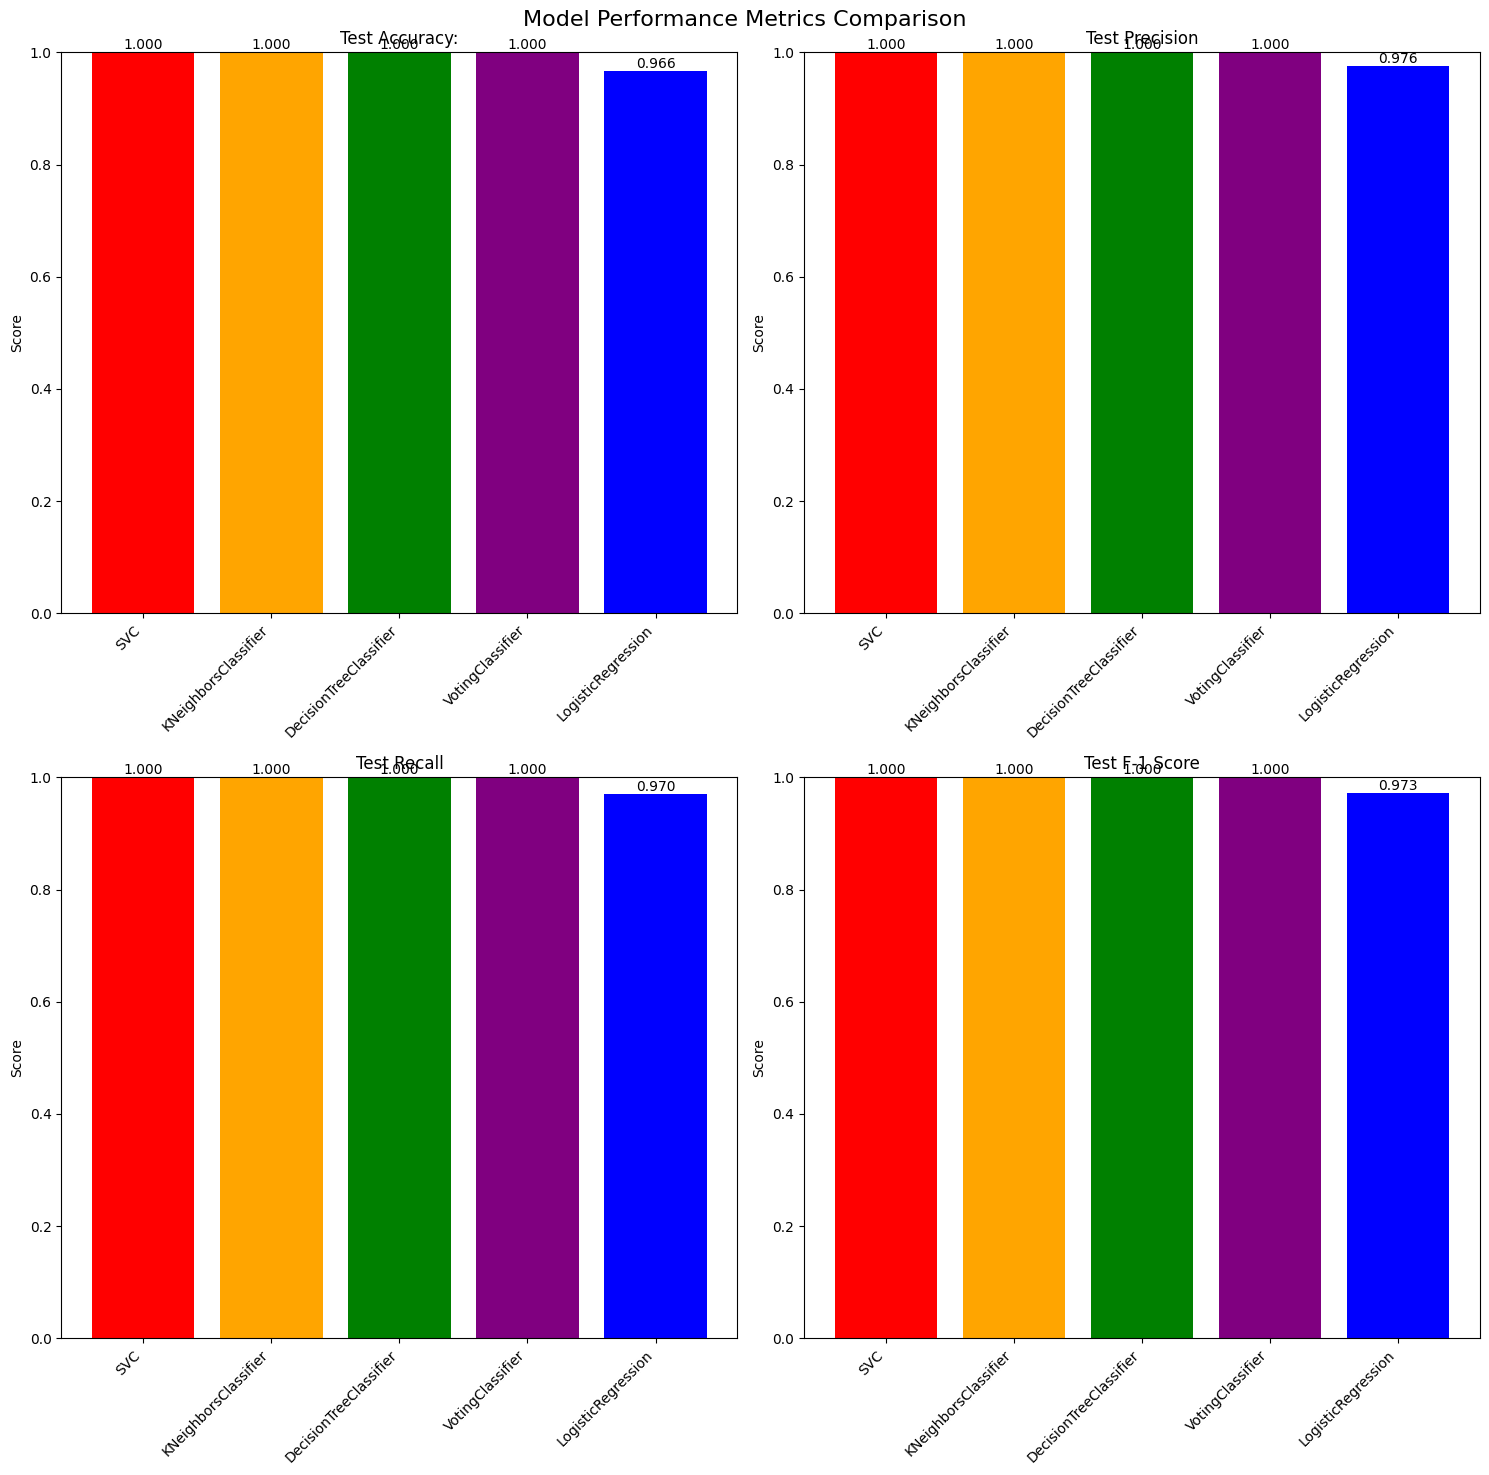

In [99]:
"""Visualisation of model scores - Display bar chart of metrics: accuracy, precision, recall, f-1 score, each bar represents a different model"""

# create figure and axes, flatten for easier iteration
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Performance Metrics Comparison', fontsize=16)
axes = axes.flatten()

# define list of titles for plots (metrics)
metrics = ['Test Accuracy:', 'Test Precision', 'Test Recall', 'Test F-1 Score']

# define a color for each a bar correspondign to a model
model_colors = {
    'SVC': 'red',
    'LogisticRegression': 'blue',
    'DecisionTreeClassifier': 'green',
    'KNeighborsClassifier': 'orange',
    'VotingClassifier': 'purple'
}

# function to get color from model_colors to match bars to models on different plots
def get_color(model):
    return model_colors.get(model.split('(')[0], None)

for ax, metric in zip(axes, metrics):
    # sorts results_df by current metric in descending order
    sorted_df = results_df.sort_values(metric, ascending=False)
    
    # create bar plots using sorted results_df
    bars = ax.bar(sorted_df['Model:'], sorted_df[metric], 
                  color=[get_color(model) for model in sorted_df['Model:']])
    ax.set_title(metric)
    ax.set_ylim(0, 1) # set limit from 0 to 1
    ax.set_ylabel('Score')
    ax.set_xticklabels(sorted_df['Model:'], rotation=45, ha='right')
    
    # add value labels above each bar
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                f'{bar.get_height():.3f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

# 4 Conclusion

- Supervised classifiers are very good at modelling and predicting edible and poisonous mushrooms in this dataset, due to strong distinctions of several features
    - note: poisonous also includes unknown edibility and not recommended
- This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).
    - Is this dataset now outdated as > 30 years old and hypothethical, how have mushrooms changed and what is the reality?
    - not all possible feature categories were represented in this data so there could be mushroom with a different mix of features that can't be well predicted by these models based on this training data

- Future work: 
    - Do more work to understand and design pipelines better
    - Newer data required to confirm validity
        - Is there modern mushroom datasets and how do these apply to real life observations?